In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from statsforecast import StatsForecast
from mlforecast import MLForecast

from statsforecast.models import AutoARIMA
from statsforecast.models import AutoETS

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsforecast\core.py:27: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
path = "../data/parquet/dataSetFinalTratadoTop5Diseases.parquet"

df = pd.read_parquet(path)

In [5]:
df.shape

(2273105, 38)

In [5]:
df.head()

Nome do RCBP       Sexo Data de Nascimento  Idade        Raca/Cor  \
0  RCBP CAMPINAS-UNICAMP  MASCULINO         16/03/1975     30          BRANCO   
1  RCBP CAMPINAS-UNICAMP   FEMININO         24/05/1950     53  SEM INFORMAÇÃO   
2  RCBP CAMPINAS-UNICAMP   FEMININO         02/09/1951     51           PARDA   
3  RCBP CAMPINAS-UNICAMP   FEMININO         21/11/1929     73  SEM INFORMAÇÃO   
4  RCBP CAMPINAS-UNICAMP  MASCULINO         03/07/1934     71          BRANCO   

   Nacionalidade Naturalidade Estado   Naturalidade Grau de Instrução  \
0         BRASIL           SÃO PAULO           None    SEM INFORMAÇÃO   
1  Não informado       Não informado  Não Informado    SEM INFORMAÇÃO   
2         BRASIL           SÃO PAULO           None    SEM INFORMAÇÃO   
3  Não informado       Não informado  Não Informado    SEM INFORMAÇÃO   
4         BRASIL           SÃO PAULO           None    SEM INFORMAÇÃO   

     Estado Civil  Código Profissão  \
0          CASADO             516.0   
1  SEM INFORMAÇÃO               0.0   
2        SOLTEIRO               0.0   
3  SEM INFORMAÇÃO               0.0   
4        SOLTEIRO               0.0   

                                      Nome Profissão Estado Endereço  \
0  TRABALHADORES NOS SERVIÇOS DE EMBELEZAMENTO E ...       SÃO PAULO   
1                                   SEM INFORMAÇÃO\t       SÃO PAULO   
2                                   SEM INFORMAÇÃO\t       SÃO PAULO   
3                                   SEM INFORMAÇÃO\t       SÃO PAULO   
4                                   SEM INFORMAÇÃO\t       SÃO PAULO   

  Cidade Endereço                 Descrição da Topografia  \
0        CAMPINAS                               RETO, SOE   
1        CAMPINAS                       COLON DESCENDENTE   
2        CAMPINAS                              MAMA , SOE   
3        CAMPINAS      PELE DO MEMBRO SUPERIOR E DO OMBRO   
4        CAMPINAS  LOCALIZACAO PRIMARIA DESCONHECIDA, SOE   

  Código da Topografia              Descrição da Morfologia  \
0                 C209                    NEOPLASIA MALIGNA   
1                 C186               ADENOCARCINOMA TUBULAR   
2                 C509         CARCINOMA DUCTAL INFILTRANTE   
3                 C446  CARCINOMA DE CELULAS ESCAMOSAS, SOE   
4                 C809                    NEOPLASIA MALIGNA   

   Código da Morfologia                 Descrição da Doenca Código da Doenca  \
0               80003.0                                RETO              C20   
1               82113.0                   COLON DESCENDENTE             C186   
2               85003.0                          MAMA , SOE             C509   
3               80703.0  PELE DO MEMBRO SUPERIOR E DO OMBRO             C446   
4               80003.0   LOCALIZACAO PRIMARIA DESCONHECIDA              C80   

  Descrição da Doenca Infantil Código da Doenca Infantil  \
0                         None                      None   
1                         None                      None   
2                         None                      None   
3                         None                      None   
4                         None                      None   

  Descrição da Doenca Adulto Jovem Código da Doenca Adulto Jovem  \
0                             None                          None   
1                             None                          None   
2                             None                          None   
3                             None                          None   
4                             None                          None   

  Indicador de Caso Raro           Meio de Diagnostico        Extensão  \
0                  False                           SDO       METÁSTASE   
1                  False  HISTOLOGIA DO TUMOR PRIMÁRIO  SEM INFORMAÇÃO   
2                  False  HISTOLOGIA DO TUMOR PRIMÁRIO  SEM INFORMAÇÃO   
3                  False  HISTOLOGIA DO TUMOR PRIMÁRIO  SEM INFORMAÇÃO   
4                  False                           

### Modelagem das séries de regiões

In [5]:
df_regioes = df[['Data de Diagnostico', 'Regiao', 'categoria_doenca']]
df_regioes['y'] = 1

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12644\899817195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regioes['y'] = 1


In [7]:
df_regioes.shape

(2273105, 4)

In [8]:
df_regioes.head()

Data de Diagnostico   Regiao categoria_doenca  y
0          2005-10-07  SUDESTE           Outros  1
1          2003-07-18  SUDESTE           Outros  1
2          2003-05-16  SUDESTE   Câncer de Mama  1
3          2003-04-01  SUDESTE   Câncer de Pele  1
4          2005-10-21  SUDESTE           Outros  1

In [9]:
df_regioes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2273105 entries, 0 to 2273104
Data columns (total 4 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Data de Diagnostico  datetime64[ns]
 1   Regiao               object        
 2   categoria_doenca     object        
 3   y                    int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 86.7+ MB


In [10]:
df_regioes.isna().sum()

Data de Diagnostico    88996
Regiao                     0
categoria_doenca           0
y                          0
dtype: int64

In [6]:
df_regioes.dropna(inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12644\2300192166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regioes.dropna(inplace=True)


In [7]:
df_regioes['year_month'] = df_regioes['Data de Diagnostico'].dt.to_period('M')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12644\2337041449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regioes['year_month'] = df_regioes['Data de Diagnostico'].dt.to_period('M')


In [7]:
df_regioes.head()

Data de Diagnostico   Regiao categoria_doenca  y year_month
0          2005-10-07  SUDESTE           Outros  1    2005-10
1          2003-07-18  SUDESTE           Outros  1    2003-07
2          2003-05-16  SUDESTE   Câncer de Mama  1    2003-05
3          2003-04-01  SUDESTE   Câncer de Pele  1    2003-04
4          2005-10-21  SUDESTE           Outros  1    2005-10

In [8]:
df_grouped = df_regioes.groupby(['year_month', 'Regiao', 'categoria_doenca'])['y'].sum().reset_index()

In [11]:
df_grouped.head()

year_month    Regiao         categoria_doenca   y
0    1990-01  NORDESTE  Câncer de Colo do Útero  20
1    1990-01  NORDESTE           Câncer de Mama  19
2    1990-01  NORDESTE           Câncer de Pele  33
3    1990-01  NORDESTE       Câncer de Próstata   8
4    1990-01  NORDESTE         Câncer de Pulmão   5

#### Por estado

In [9]:
df_nordeste = df_grouped[df_grouped['Regiao'] == 'NORDESTE'].drop('categoria_doenca', axis=1).groupby('year_month')['y'].sum().reset_index()
df_sudeste = df_grouped[df_grouped['Regiao'] == 'SUDESTE'].drop('categoria_doenca', axis=1).groupby('year_month')['y'].sum().reset_index()
df_norte = df_grouped[df_grouped['Regiao'] == 'NORTE'].drop('categoria_doenca', axis=1).groupby('year_month')['y'].sum().reset_index()
df_centro_oeste = df_grouped[df_grouped['Regiao'] == 'CENTRO-OESTE'].drop('categoria_doenca', axis=1).groupby('year_month')['y'].sum().reset_index()
df_sul = df_grouped[df_grouped['Regiao'] == 'SUL'].drop('categoria_doenca', axis=1).groupby('year_month')['y'].sum().reset_index()

In [10]:
def verificar_periodo_completo(dataframe, coluna):
    data_mais_antiga = dataframe[coluna].min()
    data_mais_recente = dataframe[coluna].max()
    
    intervalo_completo = pd.period_range(start=data_mais_antiga, end=data_mais_recente, freq='M')
    
    todas_datas_presentes = all(data in dataframe[coluna].values for data in intervalo_completo)
    
    return data_mais_antiga, data_mais_recente, todas_datas_presentes

In [11]:
dfs = [df_nordeste, df_sudeste, df_norte, df_centro_oeste, df_sul]

for df in dfs:
    data_mais_antiga, data_mais_recente, todas_datas_presentes = verificar_periodo_completo(df, 'year_month')
    print(f"Data mais antiga: {data_mais_antiga}, Data mais recente: {data_mais_recente}, Todas as datas presentes: {todas_datas_presentes}")

Data mais antiga: 1990-01, Data mais recente: 2018-12, Todas as datas presentes: True
Data mais antiga: 1991-01, Data mais recente: 2020-12, Todas as datas presentes: True
Data mais antiga: 1996-01, Data mais recente: 2019-12, Todas as datas presentes: True
Data mais antiga: 1999-01, Data mais recente: 2018-12, Todas as datas presentes: True
Data mais antiga: 1993-01, Data mais recente: 2018-12, Todas as datas presentes: True


In [12]:
def recortar_dataframe(dataframe, coluna, data_inicio, data_fim):
    data_inicio = pd.Period(data_inicio, freq='M')
    data_fim = pd.Period(data_fim, freq='M')
    
    dataframe_recortado = dataframe[(dataframe[coluna] >= data_inicio) & (dataframe[coluna] <= data_fim)]
    
    return dataframe_recortado

In [13]:
df_nordeste = recortar_dataframe(df_nordeste, 'year_month', '1999-01', '2018-12')
df_sudeste = recortar_dataframe(df_sudeste, 'year_month', '1999-01', '2018-12')
df_norte = recortar_dataframe(df_norte, 'year_month', '1999-01', '2018-12')
df_centro_oeste = recortar_dataframe(df_centro_oeste, 'year_month', '1999-01', '2018-12')
df_sul = recortar_dataframe(df_sul, 'year_month', '1999-01', '2018-12')

In [14]:
df_nordeste['unique_id'] = 'NORDESTE'
df_sudeste['unique_id'] = 'SUDESTE'
df_norte['unique_id'] = 'NORTE'
df_centro_oeste['unique_id'] = 'CENTRO-OESTE'
df_sul['unique_id'] = 'SUL'

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12644\3163250056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nordeste['unique_id'] = 'NORDESTE'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12644\3163250056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sudeste['unique_id'] = 'SUDESTE'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12644\3163250056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [15]:
def concatenar_datasets(*dataframes):
    dataframe_concatenado = pd.concat(dataframes, ignore_index=True)
    return dataframe_concatenado

serie_regiao = concatenar_datasets(df_nordeste, df_sudeste, df_norte, df_centro_oeste, df_sul)

In [16]:
serie_regiao.head(5)

year_month     y unique_id
0    1999-01  1323  NORDESTE
1    1999-02  1148  NORDESTE
2    1999-03  1616  NORDESTE
3    1999-04  1332  NORDESTE
4    1999-05  1648  NORDESTE

In [17]:
serie_regiao.rename(columns={'year_month': 'ds', 'categoria_doenca': 'unique_id'}, inplace=True)

In [18]:
serie_regiao['ds'] = serie_regiao['ds'].apply(lambda x: x.to_timestamp())

In [19]:
teste_serie_regiao = serie_regiao.groupby('unique_id').tail(12)
train_serie_regiao = serie_regiao.drop(teste_serie_regiao.index, axis = 0)

In [20]:
models = [AutoARIMA(season_length = 12), AutoETS(season_length = 12)]

In [21]:
sf = StatsForecast(
    df=train_serie_regiao,
    models=models,
    freq='M'
)

df_forecast = sf.forecast(12, fitted=True)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsforecast\core.py:467: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsforecast\core.py:467: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\utilsforecast\processing.py:362: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.

In [22]:
values = sf.forecast_fitted_values()
values.head(10)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsforecast\core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


ds      y   AutoARIMA     AutoETS
unique_id                                             
CENTRO-OESTE 1999-01-01  602.0  601.398010  524.182068
CENTRO-OESTE 1999-02-01  333.0  559.250061  451.323242
CENTRO-OESTE 1999-03-01  424.0  437.911072  553.258118
CENTRO-OESTE 1999-04-01  340.0  424.861237  381.770508
CENTRO-OESTE 1999-05-01  440.0  387.733459  423.193176
CENTRO-OESTE 1999-06-01  695.0  430.764465  444.578735
CENTRO-OESTE 1999-07-01  451.0  550.214783  509.210022
CENTRO-OESTE 1999-08-01  432.0  498.331757  510.201752
CENTRO-OESTE 1999-09-01  394.0  462.036896  428.156677
CENTRO-OESTE 1999-10-01  376.0  426.144592  418.274475

In [23]:
df_forecast = df_forecast.reset_index()
values = values.reset_index()

In [24]:
def plot_forecasts_with_ARIMA(train, test, forecast, fitted_values):
    unique_ids = train['unique_id'].unique()
    
    for uid in unique_ids:
        plt.figure(figsize=(12, 6))
        
        train_series = train[train['unique_id'] == uid]
        plt.plot(train_series['ds'], train_series['y'], label='Treinamento')
        
        test_series = test[test['unique_id'] == uid]
        plt.plot(test_series['ds'], test_series['y'], label='Teste')
        
        fitted_series = fitted_values[fitted_values['unique_id'] == uid]
        plt.plot(fitted_series['ds'], fitted_series['AutoARIMA'], label='Ajustado ARIMA')
        
        forecast_series = forecast[forecast['unique_id'] == uid]
        plt.plot(forecast_series['ds'], forecast_series['AutoARIMA'], label='Previsão AutoARIMA')
        
        plt.title(f'Série Temporais para {uid}')
        plt.xlabel('Data')
        plt.ylabel('Valores')
        plt.legend()
        plt.show()

In [25]:
def plot_forecasts_with_ETS(train, test, forecast, fitted_values):
    unique_ids = train['unique_id'].unique()
    
    for uid in unique_ids:
        plt.figure(figsize=(12, 6))
        
        train_series = train[train['unique_id'] == uid]
        plt.plot(train_series['ds'], train_series['y'], label='Treinamento')
        
        test_series = test[test['unique_id'] == uid]
        plt.plot(test_series['ds'], test_series['y'], label='Teste')

        fitted_series = fitted_values[fitted_values['unique_id'] == uid]
        plt.plot(fitted_series['ds'], fitted_series['AutoETS'], label='Ajustado ETS')
        
        forecast_series = forecast[forecast['unique_id'] == uid]
        plt.plot(forecast_series['ds'], forecast_series['AutoETS'], label='Previsão AutoETS')
        
        plt.title(f'Série Temporais para {uid}')
        plt.xlabel('Data')
        plt.ylabel('Valores')
        plt.legend()
        plt.show()

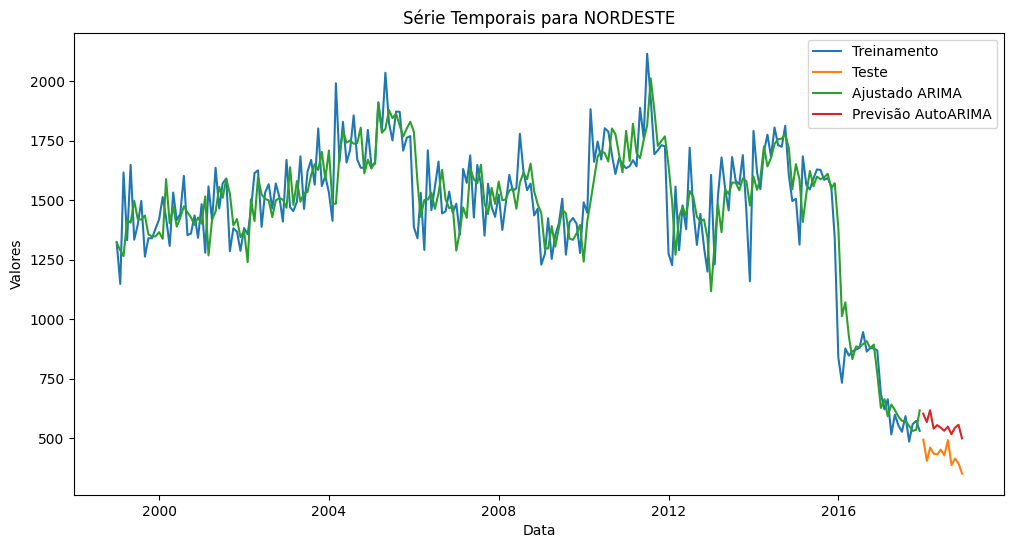

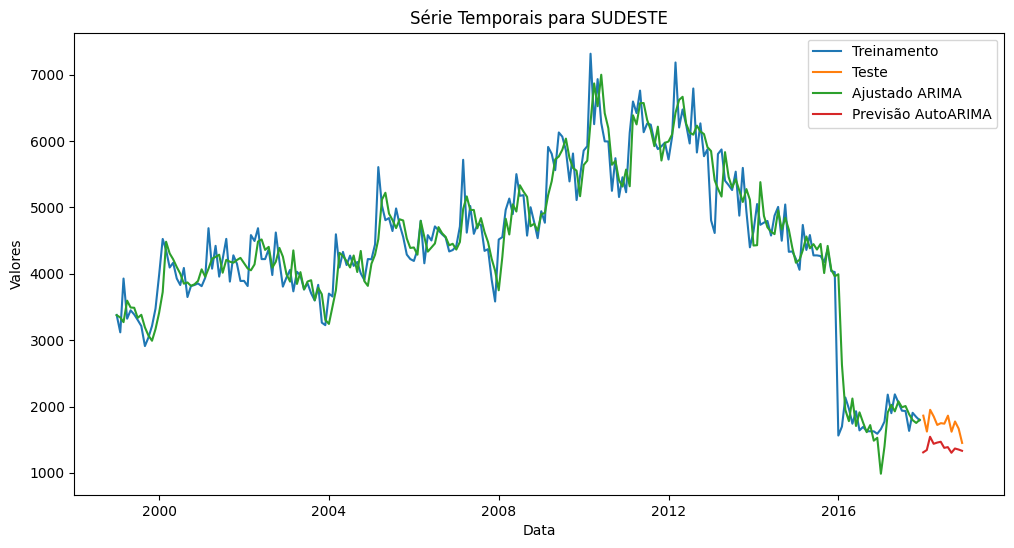

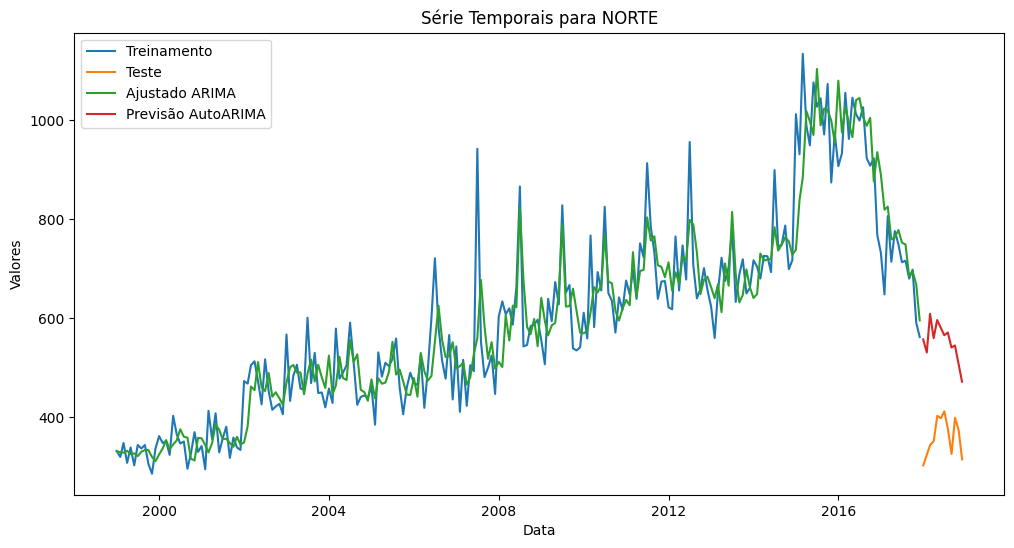

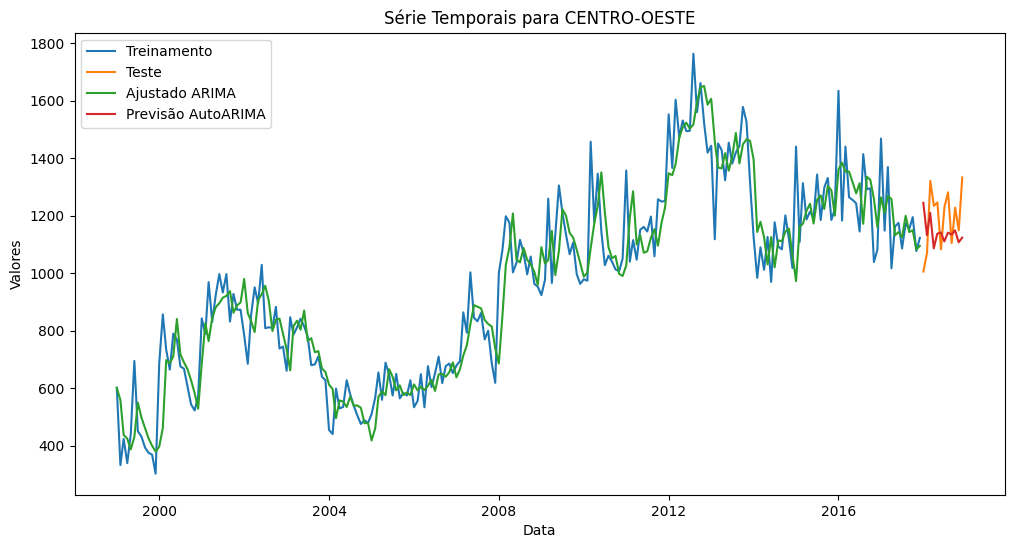

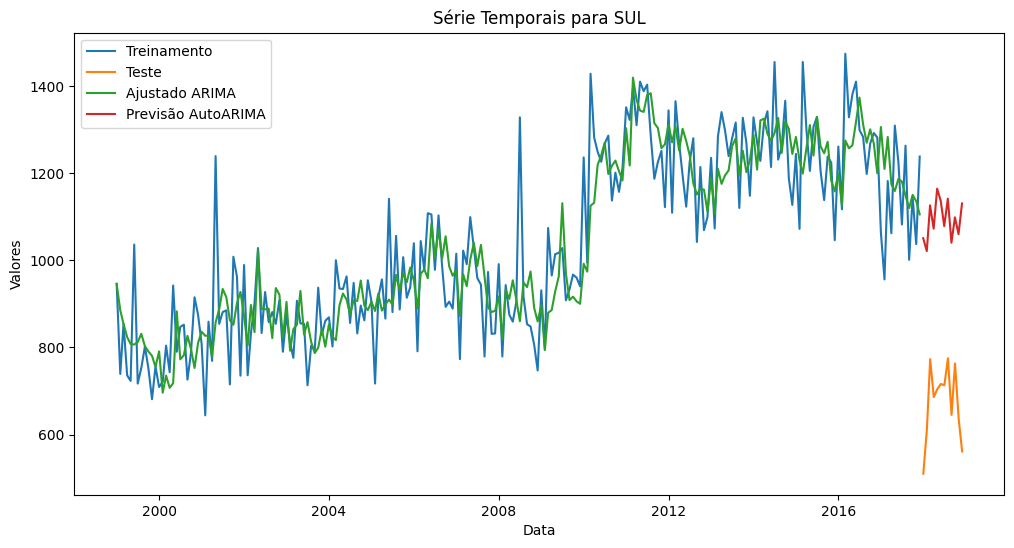

In [26]:
plot_forecasts_with_ARIMA(train_serie_regiao, teste_serie_regiao, df_forecast, values)

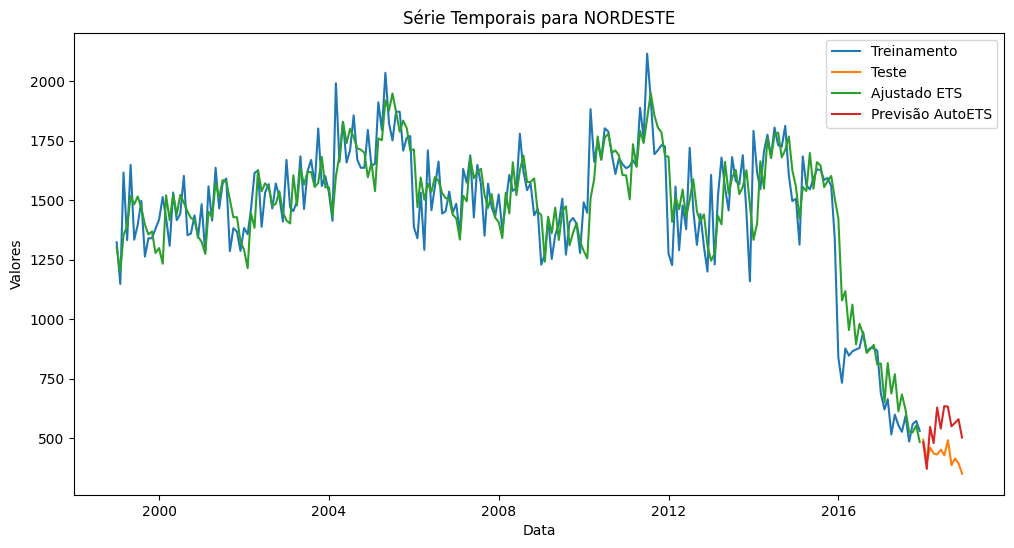

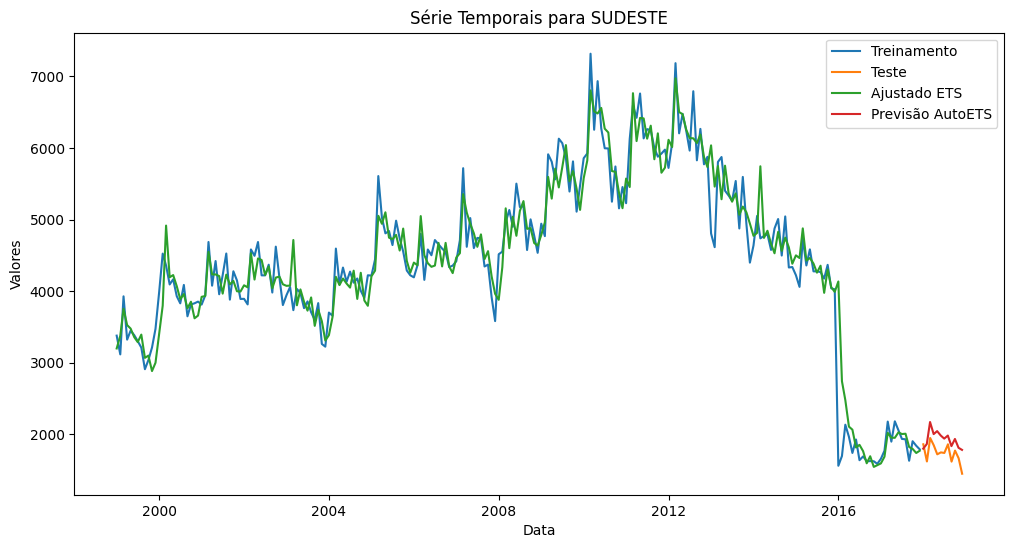

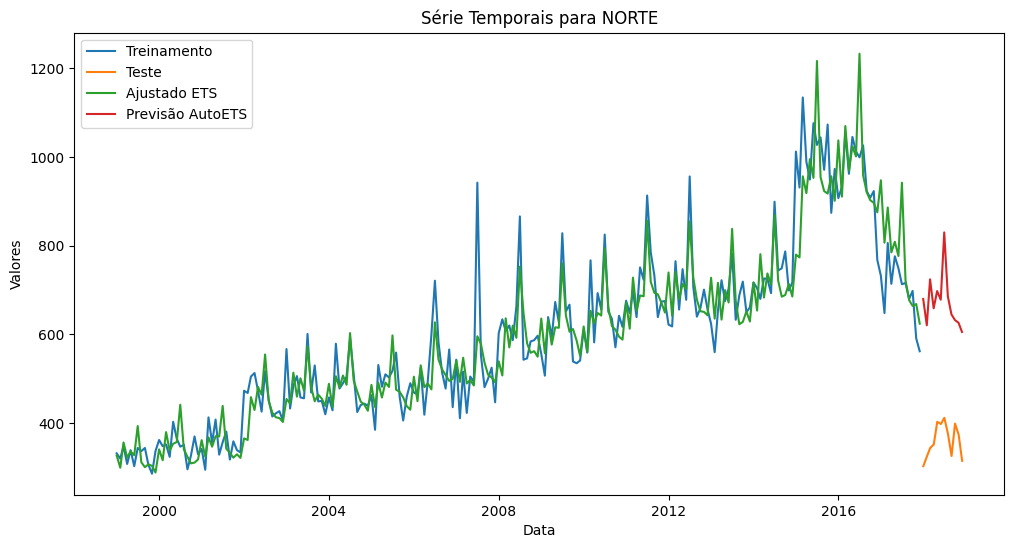

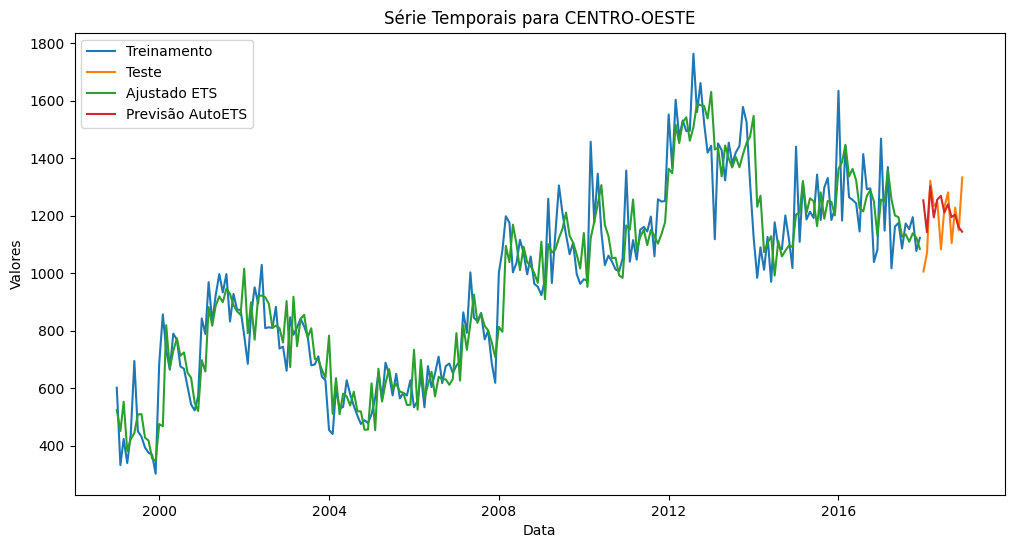

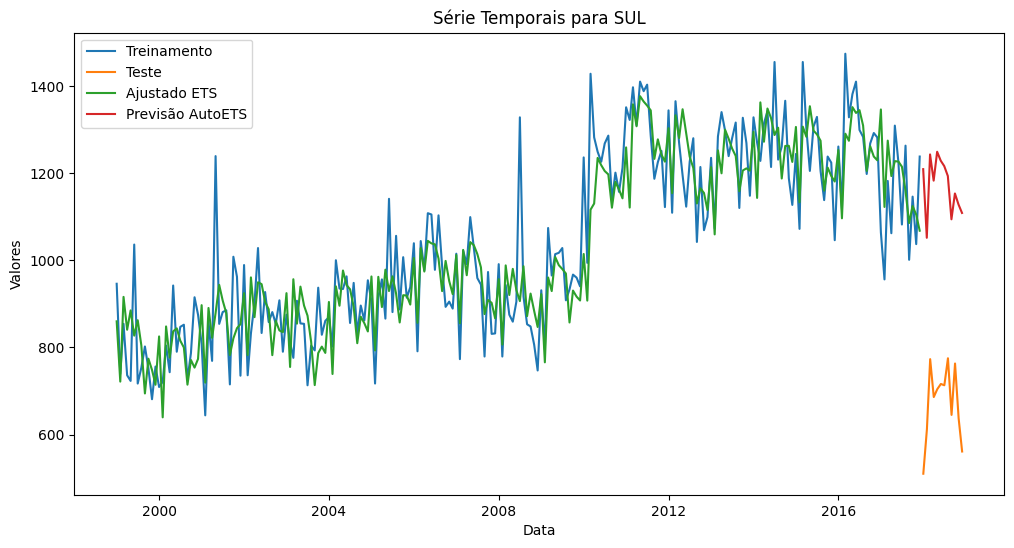

In [123]:
plot_forecasts_with_ETS(train_serie_regiao, teste_serie_regiao, df_forecast, values)

#### Por estado e doença

In [27]:
df_nordeste = df_grouped[df_grouped['Regiao'] == 'NORDESTE']
df_sudeste = df_grouped[df_grouped['Regiao'] == 'SUDESTE']
df_norte = df_grouped[df_grouped['Regiao'] == 'NORTE']
df_centro_oeste = df_grouped[df_grouped['Regiao'] == 'CENTRO-OESTE']
df_sul = df_grouped[df_grouped['Regiao'] == 'SUL']

In [28]:
df_nordeste.head(7)

year_month    Regiao         categoria_doenca   y
0    1990-01  NORDESTE  Câncer de Colo do Útero  20
1    1990-01  NORDESTE           Câncer de Mama  19
2    1990-01  NORDESTE           Câncer de Pele  33
3    1990-01  NORDESTE       Câncer de Próstata   8
4    1990-01  NORDESTE         Câncer de Pulmão   5
5    1990-01  NORDESTE                   Outros  67
6    1990-02  NORDESTE  Câncer de Colo do Útero  18

##### Nordeste

In [22]:
df_nordeste_mama = df_nordeste[df_nordeste['categoria_doenca'] == 'Câncer de Mama']
df_nordeste_prostata = df_nordeste[df_nordeste['categoria_doenca'] == 'Câncer de Próstata']
df_nordeste_utero = df_nordeste[df_nordeste['categoria_doenca'] == 'Câncer de Colo do Útero']
df_nordeste_pele = df_nordeste[df_nordeste['categoria_doenca'] == 'Câncer de Pele']
df_nordeste_pulmao = df_nordeste[df_nordeste['categoria_doenca'] == 'Câncer de Pulmão']
df_nordeste_outros = df_nordeste[df_nordeste['categoria_doenca'] == 'Outros']

In [23]:
df_nordeste_mama.head()

year_month    Regiao categoria_doenca   y
1     1990-01  NORDESTE   Câncer de Mama  19
7     1990-02  NORDESTE   Câncer de Mama  14
13    1990-03  NORDESTE   Câncer de Mama  24
19    1990-04  NORDESTE   Câncer de Mama  24
25    1990-05  NORDESTE   Câncer de Mama  27

In [24]:
dfs_nordeste = [df_nordeste_mama, df_nordeste_prostata, df_nordeste_utero, df_nordeste_pele, df_nordeste_pulmao, df_nordeste_outros]

for df in dfs_nordeste:
    data_mais_antiga, data_mais_recente, todas_datas_presentes = verificar_periodo_completo(df, 'year_month')
    print(f"Data mais antiga: {data_mais_antiga}, Data mais recente: {data_mais_recente}, Todas as datas presentes: {todas_datas_presentes}")

Data mais antiga: 1990-01, Data mais recente: 2018-12, Todas as datas presentes: True
Data mais antiga: 1990-01, Data mais recente: 2018-12, Todas as datas presentes: True
Data mais antiga: 1990-01, Data mais recente: 2018-12, Todas as datas presentes: True
Data mais antiga: 1990-01, Data mais recente: 2018-12, Todas as datas presentes: True
Data mais antiga: 1990-01, Data mais recente: 2018-12, Todas as datas presentes: True
Data mais antiga: 1990-01, Data mais recente: 2018-12, Todas as datas presentes: True


In [25]:
df_nordeste_mama = df_nordeste_mama.drop('Regiao', axis=1)
df_nordeste_prostata = df_nordeste_prostata.drop('Regiao', axis=1)
df_nordeste_utero = df_nordeste_utero.drop('Regiao', axis=1)
df_nordeste_pele = df_nordeste_pele.drop('Regiao', axis=1)
df_nordeste_pulmao = df_nordeste_pulmao.drop('Regiao', axis=1)
df_nordeste_outros = df_nordeste_outros.drop('Regiao', axis=1)

In [26]:
df_nordeste_outros.head()

year_month categoria_doenca   y
5     1990-01           Outros  67
11    1990-02           Outros  87
17    1990-03           Outros  96
23    1990-04           Outros  77
29    1990-05           Outros  79

In [27]:
serie_nordeste = concatenar_datasets(df_nordeste_mama, df_nordeste_prostata, df_nordeste_utero, df_nordeste_pele, df_nordeste_pulmao, df_nordeste_outros)

In [28]:
serie_nordeste.head()

year_month categoria_doenca   y
0    1990-01   Câncer de Mama  19
1    1990-02   Câncer de Mama  14
2    1990-03   Câncer de Mama  24
3    1990-04   Câncer de Mama  24
4    1990-05   Câncer de Mama  27

In [55]:
serie_nordeste.rename(columns={'year_month': 'ds', 'categoria_doenca': 'unique_id'}, inplace=True)

In [56]:
serie_nordeste.head()

ds       unique_id   y
0  1990-01  Câncer de Mama  19
1  1990-02  Câncer de Mama  14
2  1990-03  Câncer de Mama  24
3  1990-04  Câncer de Mama  24
4  1990-05  Câncer de Mama  27

In [64]:
serie_nordeste['ds'] = serie_nordeste['ds'].apply(lambda x: x.to_timestamp())

In [65]:
serie_nordeste.head()

ds       unique_id   y
0 1990-01-01  Câncer de Mama  19
1 1990-02-01  Câncer de Mama  14
2 1990-03-01  Câncer de Mama  24
3 1990-04-01  Câncer de Mama  24
4 1990-05-01  Câncer de Mama  27

Separando treino e teste

In [66]:
teste_nordeste = serie_nordeste.groupby('unique_id').tail(12)
train_nordeste = serie_nordeste.drop(teste_nordeste.index, axis = 0)

In [69]:
sf = StatsForecast(
    df=train_nordeste,
    models=models,
    freq='M'
)

df_forecast = sf.forecast(12, fitted=True)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsforecast\core.py:467: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsforecast\core.py:467: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\utilsforecast\processing.py:362: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.

In [70]:
df_forecast.head(10)

ds  AutoARIMA    AutoETS
unique_id                                               
Câncer de Colo do Útero 2017-12-31  23.970091  15.399068
Câncer de Colo do Útero 2018-01-31  19.008041   8.010173
Câncer de Colo do Útero 2018-02-28  19.023897  25.225267
Câncer de Colo do Útero 2018-03-31  19.578400  22.724279
Câncer de Colo do Útero 2018-04-30  21.450970  36.165482
Câncer de Colo do Útero 2018-05-31  21.265621  29.300076
Câncer de Colo do Útero 2018-06-30  19.221430  37.259571
Câncer de Colo do Útero 2018-07-31  22.168337  40.328587
Câncer de Colo do Útero 2018-08-31  22.775028  38.253185
Câncer de Colo do Útero 2018-09-30  18.333994  38.625343

In [71]:
values = sf.forecast_fitted_values()
values.head(10)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsforecast\core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


ds      y  AutoARIMA    AutoETS
unique_id                                                      
Câncer de Colo do Útero 1990-01-01   20.0  19.980000  26.482580
Câncer de Colo do Útero 1990-02-01   18.0  19.562130  16.960741
Câncer de Colo do Útero 1990-03-01   25.0  19.600410  22.550760
Câncer de Colo do Útero 1990-04-01   47.0  22.825239  27.625725
Câncer de Colo do Útero 1990-05-01   27.0  29.580128  29.666391
Câncer de Colo do Útero 1990-06-01   24.0  29.760206  29.347168
Câncer de Colo do Útero 1990-07-01  127.0  32.344418  69.458496
Câncer de Colo do Útero 1990-08-01   24.0  55.394653  55.999435
Câncer de Colo do Útero 1990-09-01   27.0  50.809559  41.079330
Câncer de Colo do Útero 1990-10-01   26.0  42.069244  31.548359

In [83]:
df_forecast = df_forecast.reset_index()
values = values.reset_index()

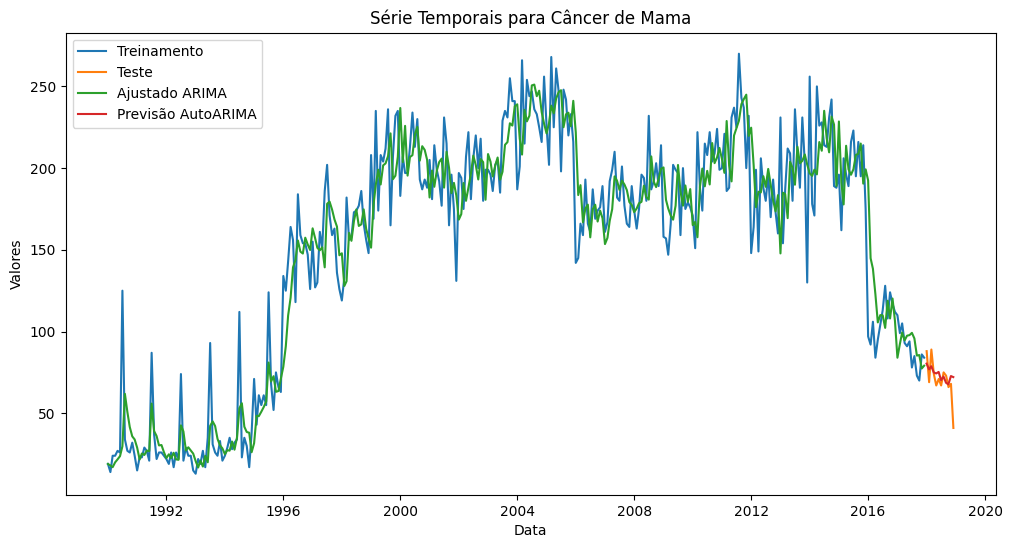

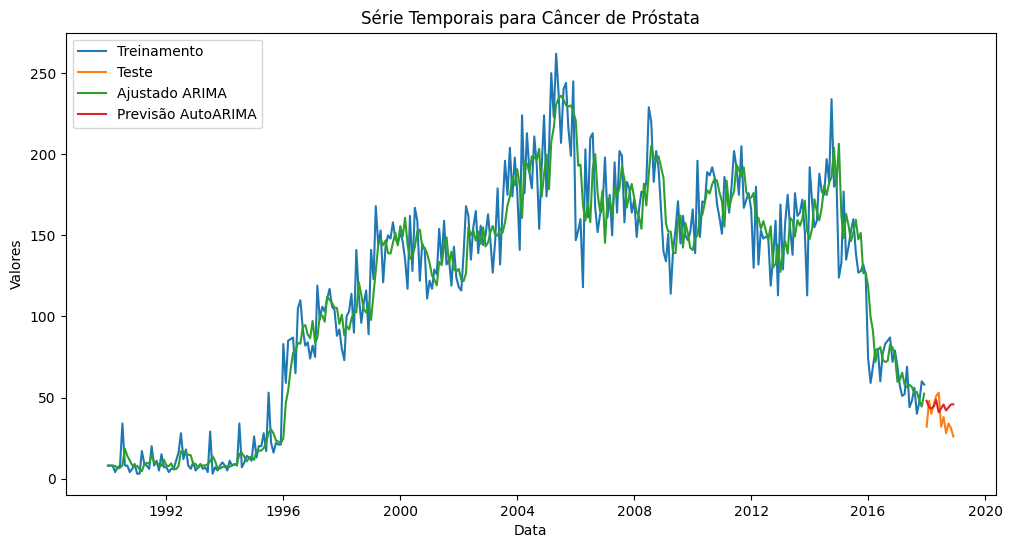

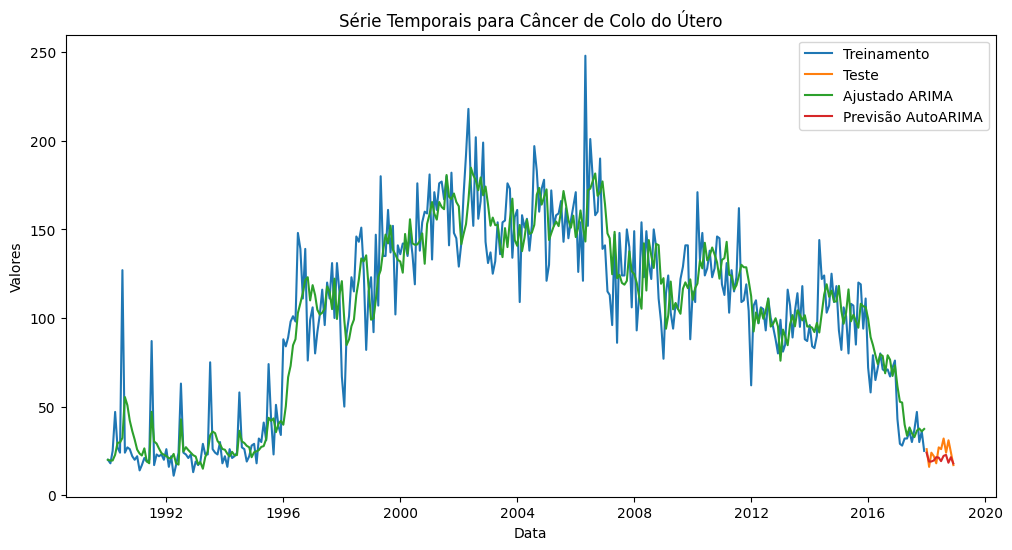

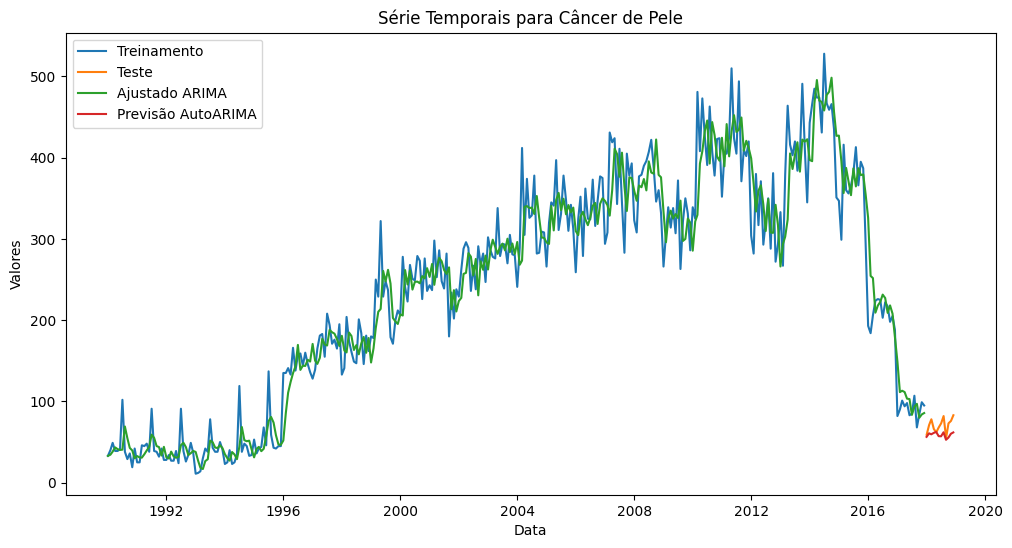

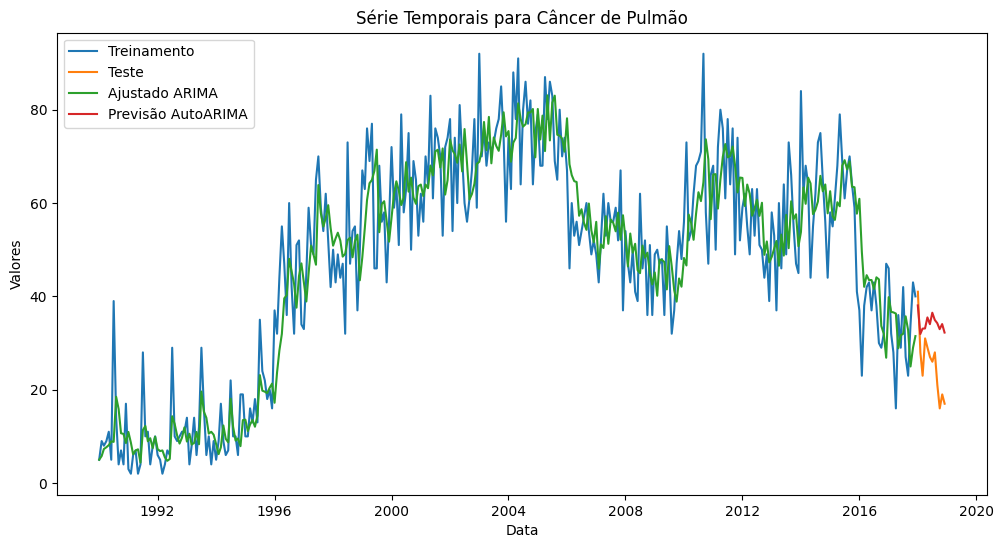

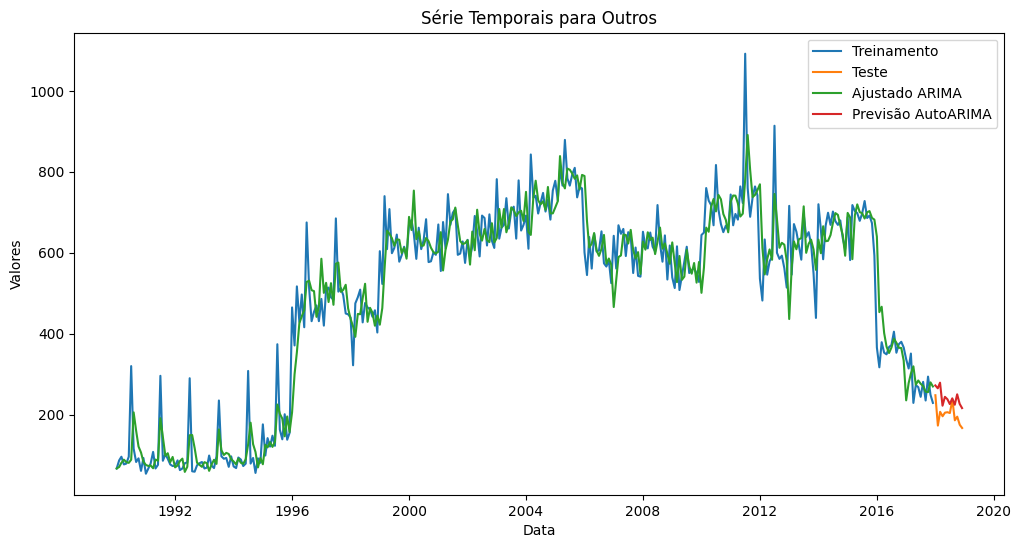

In [86]:
plot_forecasts_with_ARIMA(train_nordeste, teste_nordeste, df_forecast, values)


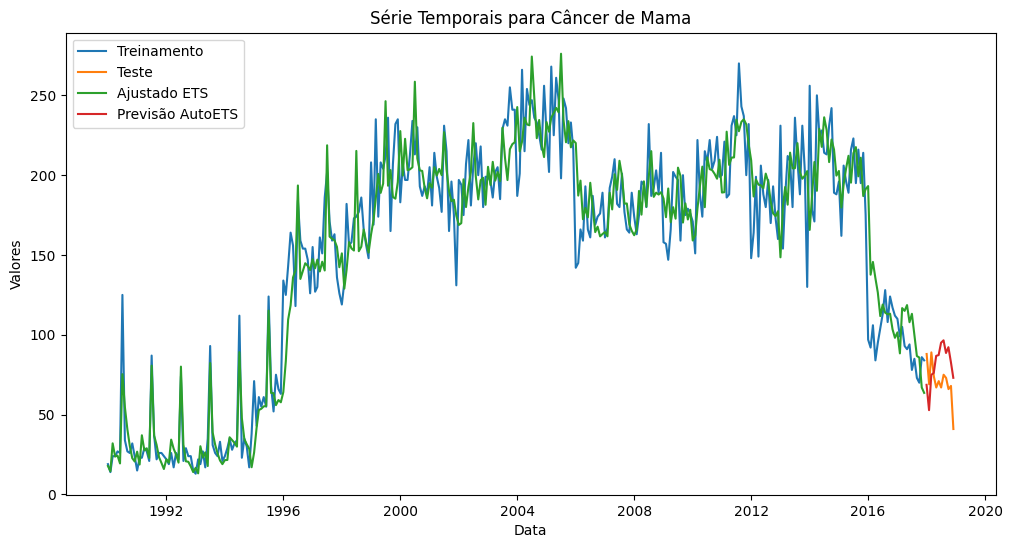

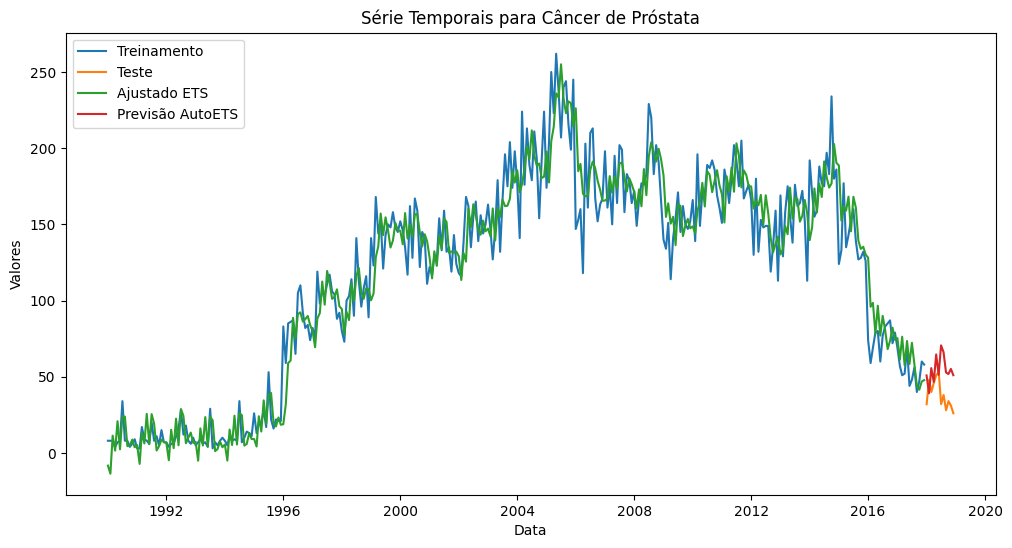

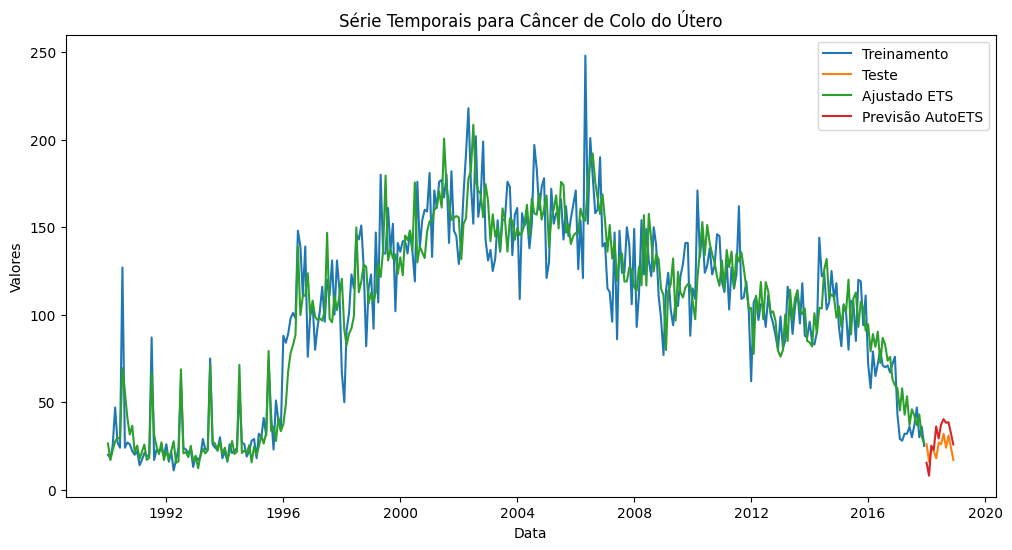

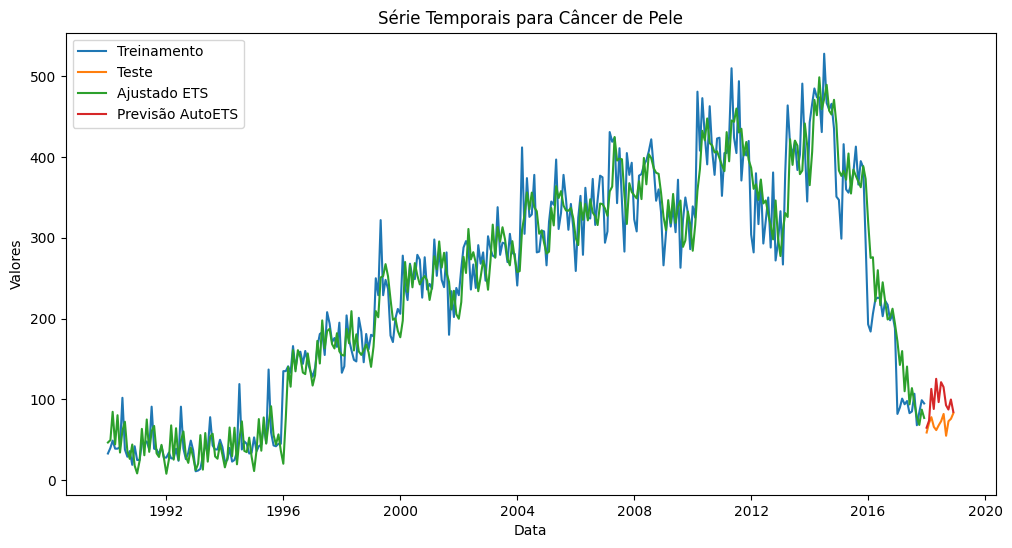

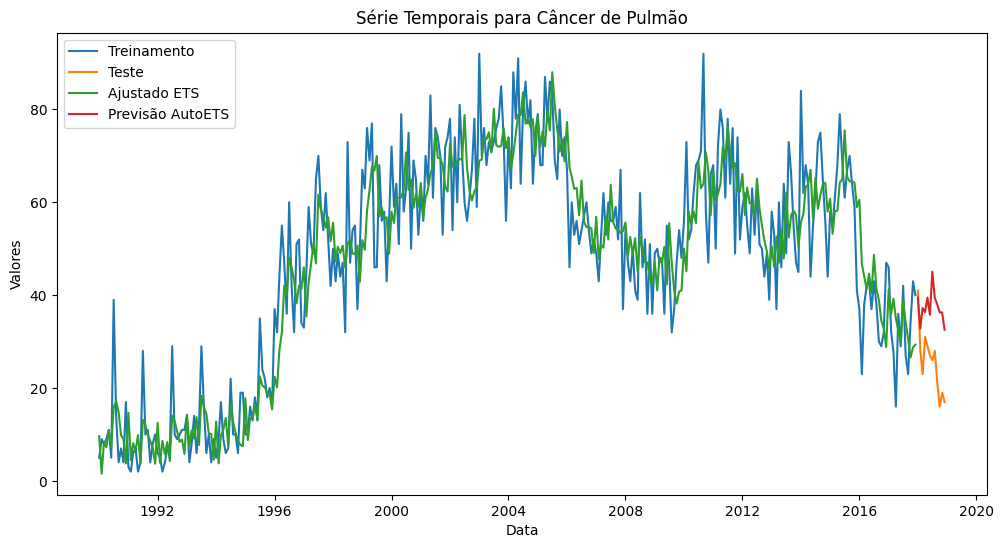

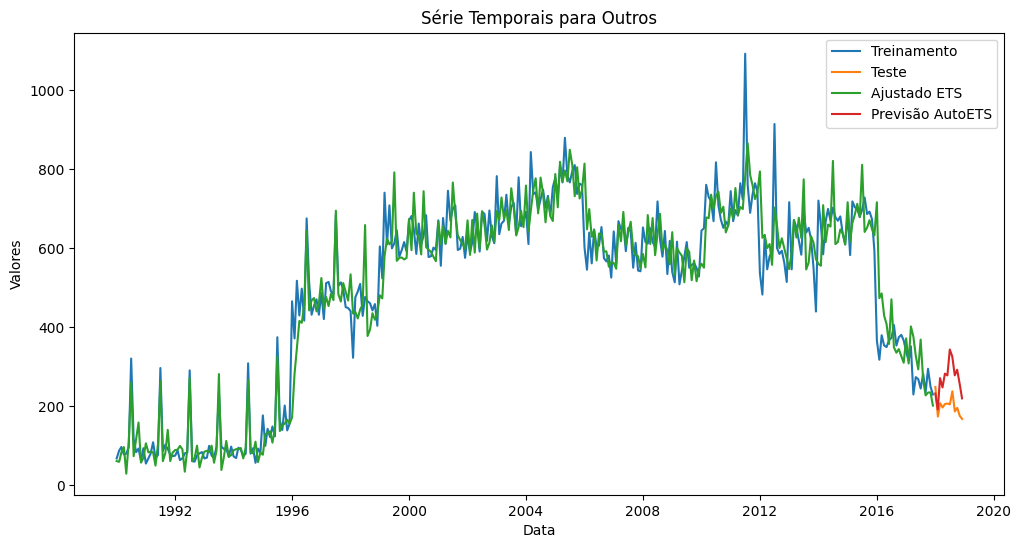

In [87]:
plot_forecasts_with_ETS(train_nordeste, teste_nordeste, df_forecast, values)

##### Sudeste

In [29]:
df_sudeste_mama = df_sudeste[df_sudeste['categoria_doenca'] == 'Câncer de Mama']
df_sudeste_prostata = df_sudeste[df_sudeste['categoria_doenca'] == 'Câncer de Próstata']
df_sudeste_utero = df_sudeste[df_sudeste['categoria_doenca'] == 'Câncer de Colo do Útero']
df_sudeste_pele = df_sudeste[df_sudeste['categoria_doenca'] == 'Câncer de Pele']
df_sudeste_pulmao = df_sudeste[df_sudeste['categoria_doenca'] == 'Câncer de Pulmão']
df_sudeste_outros = df_sudeste[df_sudeste['categoria_doenca'] == 'Outros']

In [30]:
df_sudeste_mama.head()

year_month   Regiao categoria_doenca   y
79     1991-01  SUDESTE   Câncer de Mama  20
91     1991-02  SUDESTE   Câncer de Mama  13
103    1991-03  SUDESTE   Câncer de Mama  12
115    1991-04  SUDESTE   Câncer de Mama  14
127    1991-05  SUDESTE   Câncer de Mama  27

In [31]:
dfs_sudeste = [df_sudeste_mama, df_sudeste_prostata, df_sudeste_utero, df_sudeste_pele, df_sudeste_pulmao, df_sudeste_outros]

for df in dfs_sudeste:
    data_mais_antiga, data_mais_recente, todas_datas_presentes = verificar_periodo_completo(df, 'year_month')
    print(f"Data mais antiga: {data_mais_antiga}, Data mais recente: {data_mais_recente}, Todas as datas presentes: {todas_datas_presentes}")

Data mais antiga: 1991-01, Data mais recente: 2020-12, Todas as datas presentes: True
Data mais antiga: 1991-01, Data mais recente: 2020-12, Todas as datas presentes: False
Data mais antiga: 1991-01, Data mais recente: 2020-12, Todas as datas presentes: False
Data mais antiga: 1991-01, Data mais recente: 2020-12, Todas as datas presentes: False
Data mais antiga: 1991-01, Data mais recente: 2020-08, Todas as datas presentes: False
Data mais antiga: 1991-01, Data mais recente: 2020-12, Todas as datas presentes: True


In [38]:
def pegar_datas_faltando(dataframe, coluna):
    data_mais_antiga = dataframe[coluna].min()
    data_mais_recente = dataframe[coluna].max()
    
    intervalo_completo = pd.period_range(start=data_mais_antiga, end=data_mais_recente, freq='M')

    datas_faltantes = [data for data in intervalo_completo if data not in dataframe[coluna].values]
    
    return datas_faltantes

In [39]:
print(pegar_datas_faltando(df_sudeste_prostata, 'year_month'))

[Period('1992-06', 'M')]


In [40]:
print(pegar_datas_faltando(df_sudeste_utero, 'year_month'))

[Period('2020-05', 'M')]


In [41]:
print(pegar_datas_faltando(df_sudeste_pele, 'year_month'))

[Period('1993-06', 'M'), Period('1994-01', 'M'), Period('1994-07', 'M'), Period('1994-09', 'M'), Period('1994-12', 'M'), Period('1995-04', 'M'), Period('1995-07', 'M'), Period('1995-09', 'M')]


In [42]:
print(pegar_datas_faltando(df_sudeste_pulmao, 'year_month'))

[Period('2020-01', 'M'), Period('2020-03', 'M'), Period('2020-04', 'M'), Period('2020-05', 'M')]


##### Centro-oeste

In [32]:
df_centro_oeste_mama = df_centro_oeste[df_centro_oeste['categoria_doenca'] == 'Câncer de Mama']
df_centro_oeste_prostata = df_centro_oeste[df_centro_oeste['categoria_doenca'] == 'Câncer de Próstata']
df_centro_oeste_utero = df_centro_oeste[df_centro_oeste['categoria_doenca'] == 'Câncer de Colo do Útero']
df_centro_oeste_pele = df_centro_oeste[df_centro_oeste['categoria_doenca'] == 'Câncer de Pele']
df_centro_oeste_pulmao = df_centro_oeste[df_centro_oeste['categoria_doenca'] == 'Câncer de Pulmão']
df_centro_oeste_outros = df_centro_oeste[df_centro_oeste['categoria_doenca'] == 'Outros']

In [33]:
df_centro_oeste_mama.head()

year_month        Regiao categoria_doenca   y
1864    1999-01  CENTRO-OESTE   Câncer de Mama  47
1894    1999-02  CENTRO-OESTE   Câncer de Mama  31
1924    1999-03  CENTRO-OESTE   Câncer de Mama  41
1954    1999-04  CENTRO-OESTE   Câncer de Mama  55
1984    1999-05  CENTRO-OESTE   Câncer de Mama  55

In [34]:
dfs_centro_oeste = [df_centro_oeste_mama, df_centro_oeste_prostata, df_centro_oeste_utero, df_centro_oeste_pele, df_centro_oeste_pulmao, df_centro_oeste_outros]

for df in dfs_centro_oeste:
    data_mais_antiga, data_mais_recente, todas_datas_presentes = verificar_periodo_completo(df, 'year_month')
    print(f"Data mais antiga: {data_mais_antiga}, Data mais recente: {data_mais_recente}, Todas as datas presentes: {todas_datas_presentes}")

Data mais antiga: 1999-01, Data mais recente: 2018-12, Todas as datas presentes: True
Data mais antiga: 1999-01, Data mais recente: 2018-12, Todas as datas presentes: True
Data mais antiga: 1999-01, Data mais recente: 2018-12, Todas as datas presentes: True
Data mais antiga: 1999-01, Data mais recente: 2018-12, Todas as datas presentes: True
Data mais antiga: 1999-01, Data mais recente: 2018-12, Todas as datas presentes: True
Data mais antiga: 1999-01, Data mais recente: 2018-12, Todas as datas presentes: True


In [35]:
df_centro_oeste_mama = df_centro_oeste_mama.drop('Regiao', axis=1)
df_centro_oeste_prostata = df_centro_oeste_prostata.drop('Regiao', axis=1)
df_centro_oeste_utero = df_centro_oeste_utero.drop('Regiao', axis=1)
df_centro_oeste_pele = df_centro_oeste_pele.drop('Regiao', axis=1)
df_centro_oeste_pulmao = df_centro_oeste_pulmao.drop('Regiao', axis=1)
df_centro_oeste_outros = df_centro_oeste_outros.drop('Regiao', axis=1)

In [36]:
df_centro_oeste_outros.head()

year_month categoria_doenca    y
1868    1999-01           Outros  363
1898    1999-02           Outros  160
1928    1999-03           Outros  229
1958    1999-04           Outros  179
1988    1999-05           Outros  207

In [37]:
serie_centro_oeste = concatenar_datasets(df_centro_oeste_mama, df_centro_oeste_prostata, df_centro_oeste_utero, df_centro_oeste_pele, df_centro_oeste_pulmao, df_centro_oeste_outros)

In [38]:
serie_centro_oeste.head()

year_month categoria_doenca   y
0    1999-01   Câncer de Mama  47
1    1999-02   Câncer de Mama  31
2    1999-03   Câncer de Mama  41
3    1999-04   Câncer de Mama  55
4    1999-05   Câncer de Mama  55

In [89]:
serie_centro_oeste.rename(columns={'year_month': 'ds', 'categoria_doenca': 'unique_id'}, inplace=True)

In [90]:
serie_centro_oeste['ds'] = serie_centro_oeste['ds'].apply(lambda x: x.to_timestamp())

In [91]:
teste_centro_oeste = serie_centro_oeste.groupby('unique_id').tail(12)
train_centro_oeste = serie_centro_oeste.drop(teste_centro_oeste.index, axis = 0)

In [92]:
sf = StatsForecast(
    df=train_centro_oeste,
    models=models,
    freq='M'
)

df_forecast = sf.forecast(12, fitted=True)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsforecast\core.py:467: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsforecast\core.py:467: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\utilsforecast\processing.py:362: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.

In [93]:
values = sf.forecast_fitted_values()
values.head(10)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsforecast\core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


ds     y  AutoARIMA    AutoETS
unique_id                                                     
Câncer de Colo do Útero 1999-01-01  76.0  75.924004  64.965218
Câncer de Colo do Útero 1999-02-01  64.0  74.217766  72.315155
Câncer de Colo do Útero 1999-03-01  63.0  68.789223  79.074661
Câncer de Colo do Útero 1999-04-01  47.0  65.595009  60.707355
Câncer de Colo do Útero 1999-05-01  58.0  57.640934  67.852219
Câncer de Colo do Útero 1999-06-01  70.0  58.071522  67.637985
Câncer de Colo do Útero 1999-07-01  79.0  63.459988  67.437897
Câncer de Colo do Útero 1999-08-01  70.0  70.016136  73.955559
Câncer de Colo do Útero 1999-09-01  58.0  69.748413  61.634232
Câncer de Colo do Útero 1999-10-01  57.0  64.624718  66.879784

In [94]:
df_forecast = df_forecast.reset_index()
values = values.reset_index()

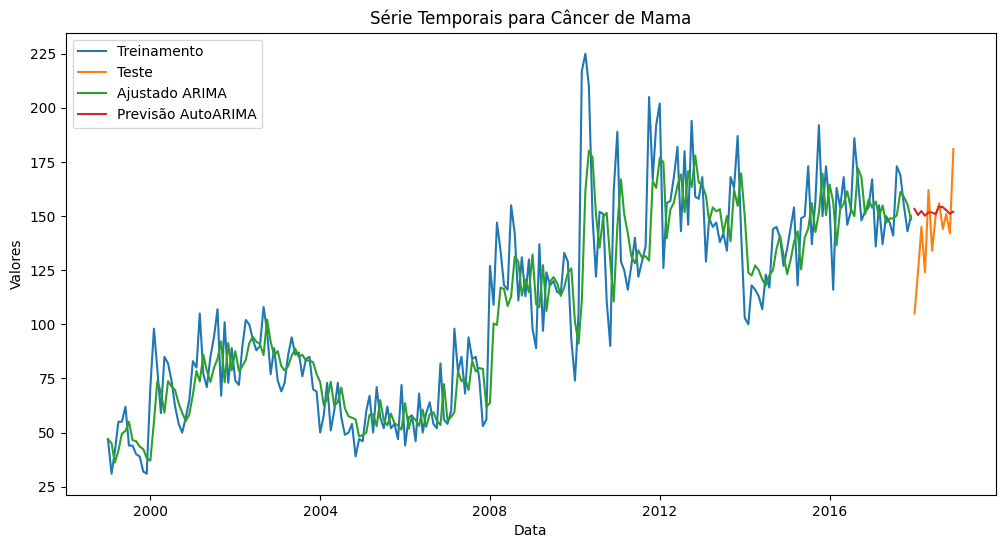

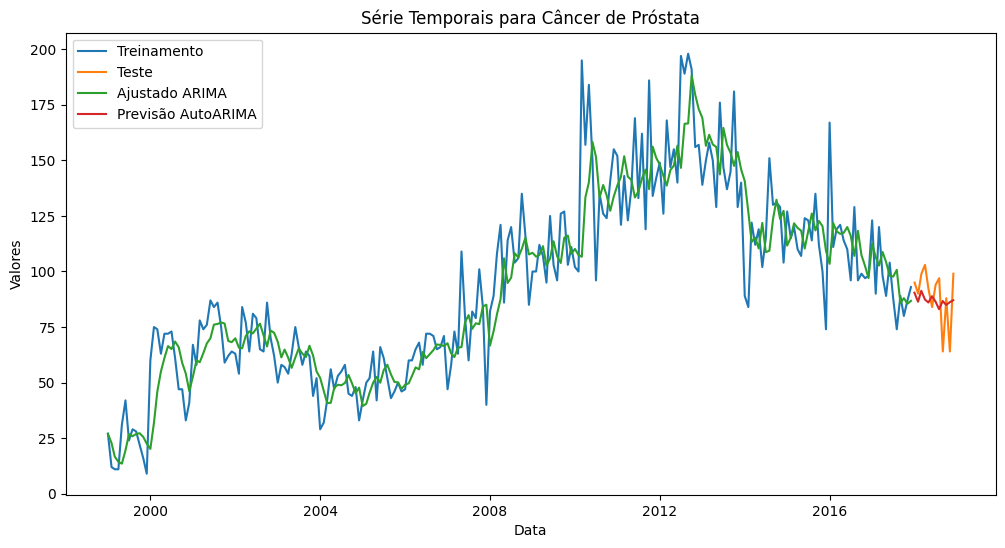

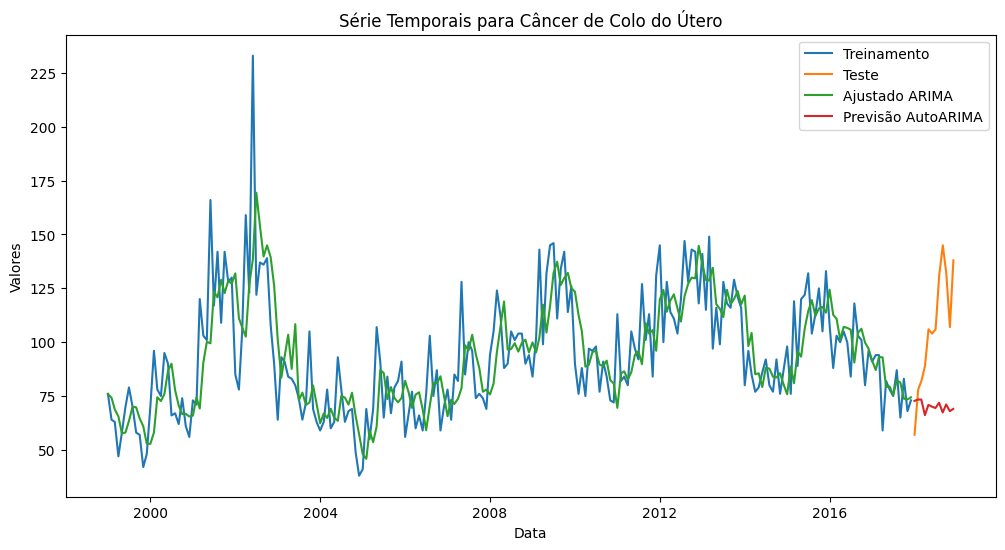

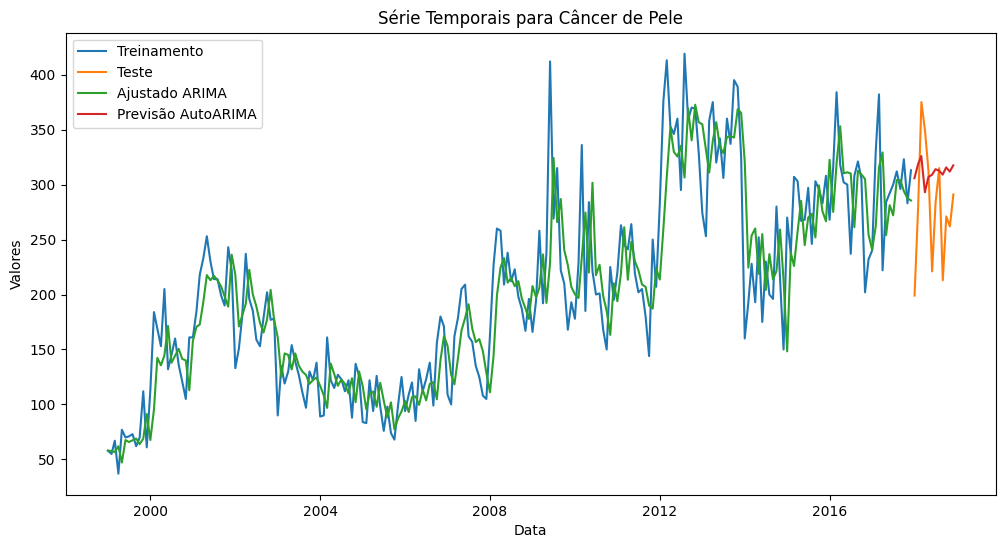

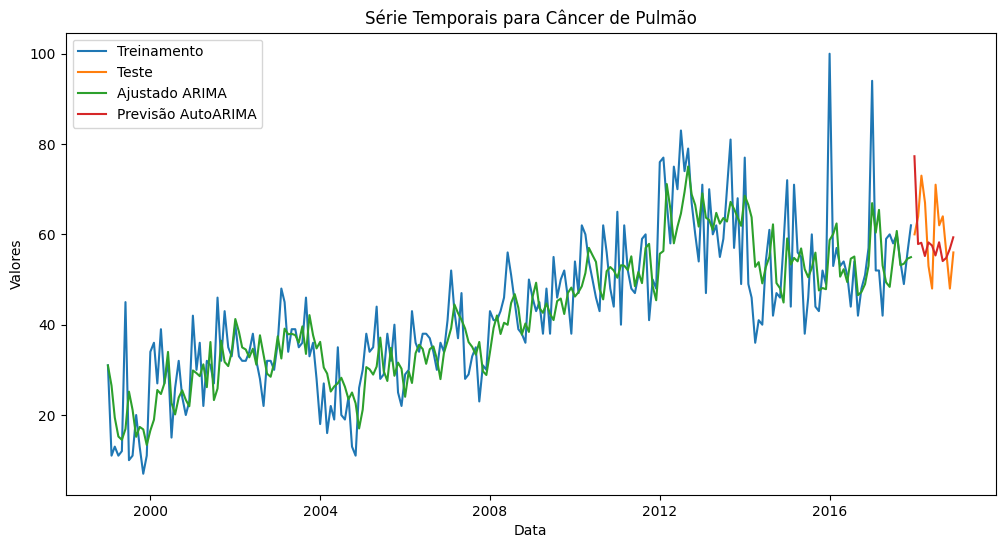

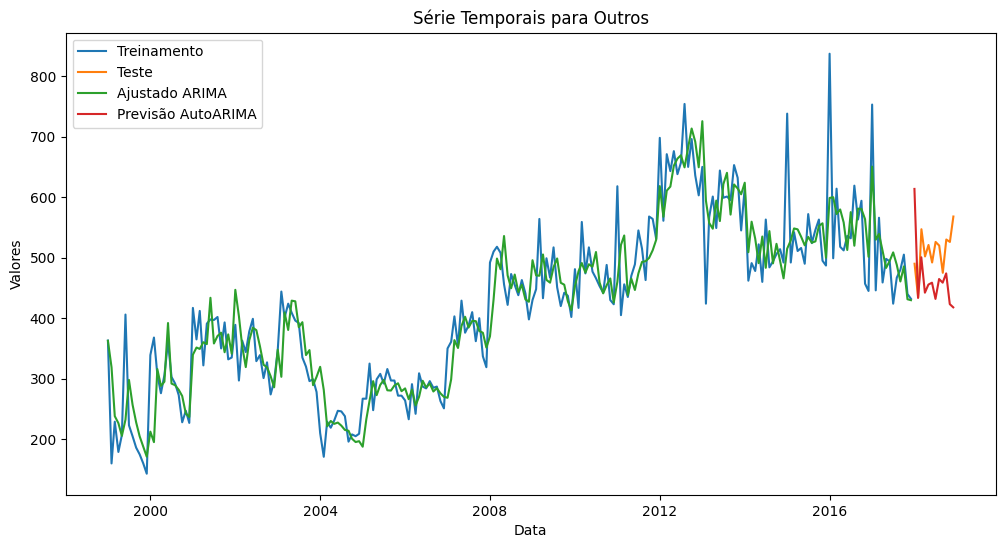

In [95]:
plot_forecasts_with_ARIMA(train_centro_oeste, teste_centro_oeste, df_forecast, values)

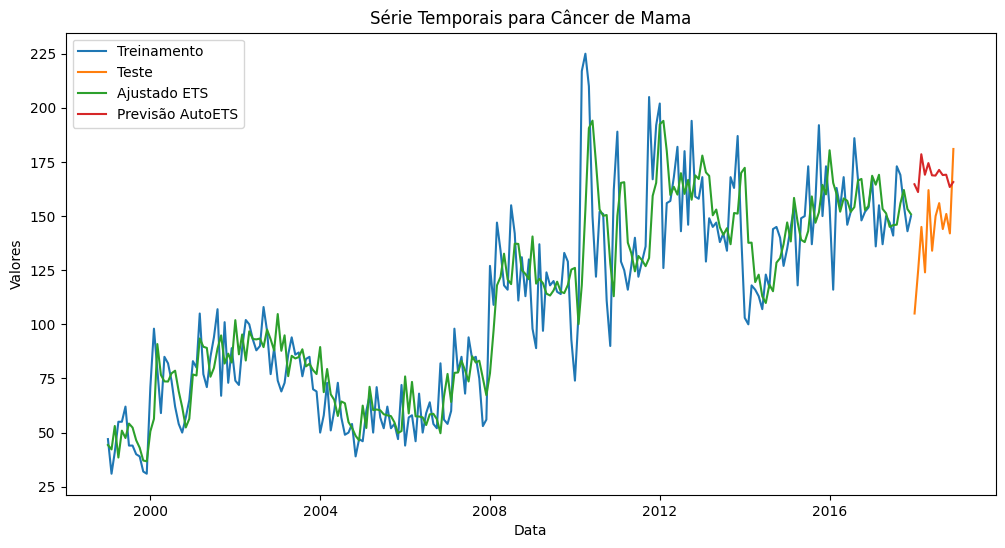

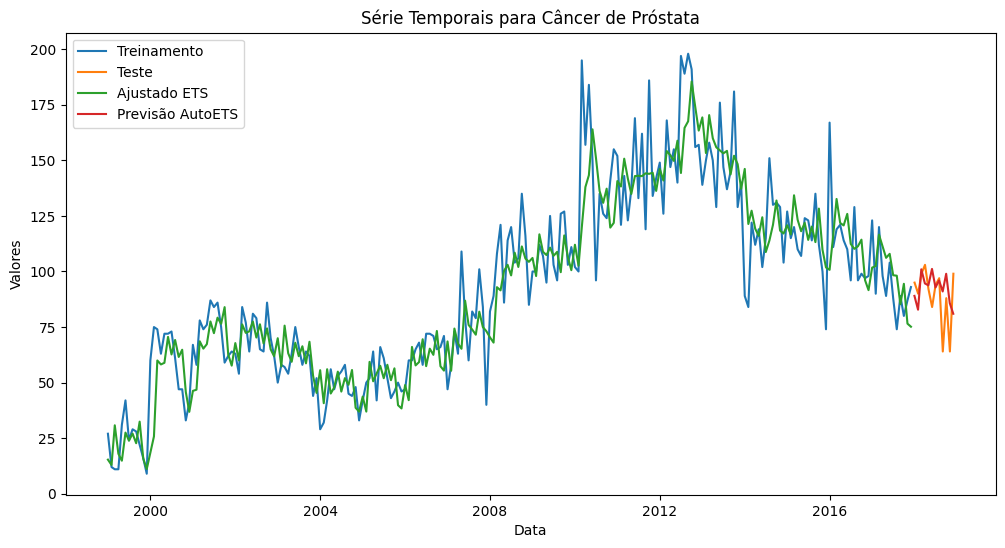

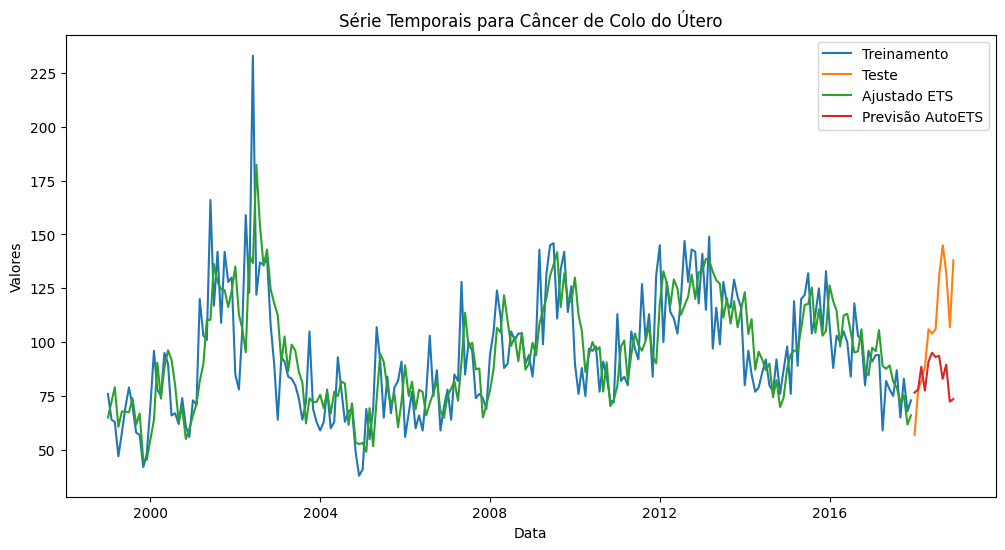

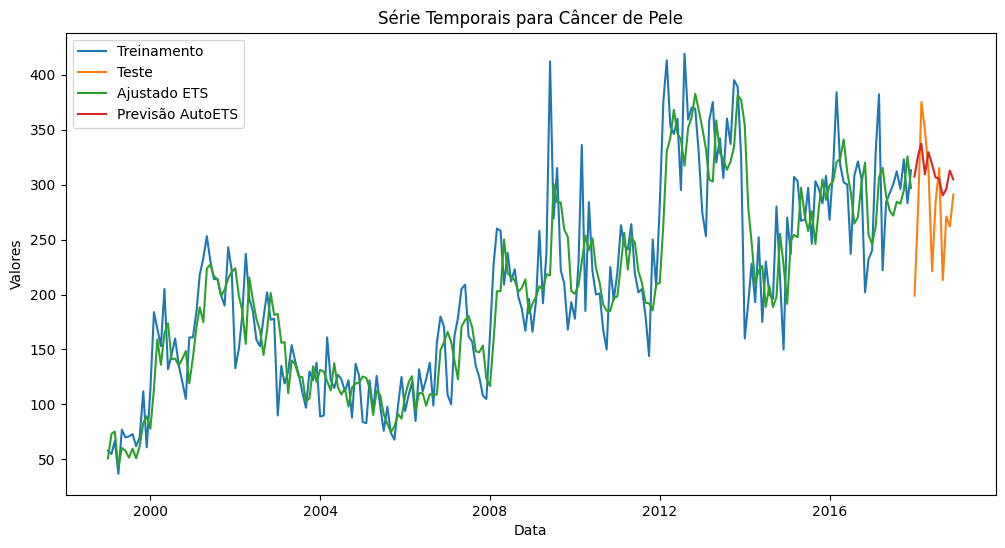

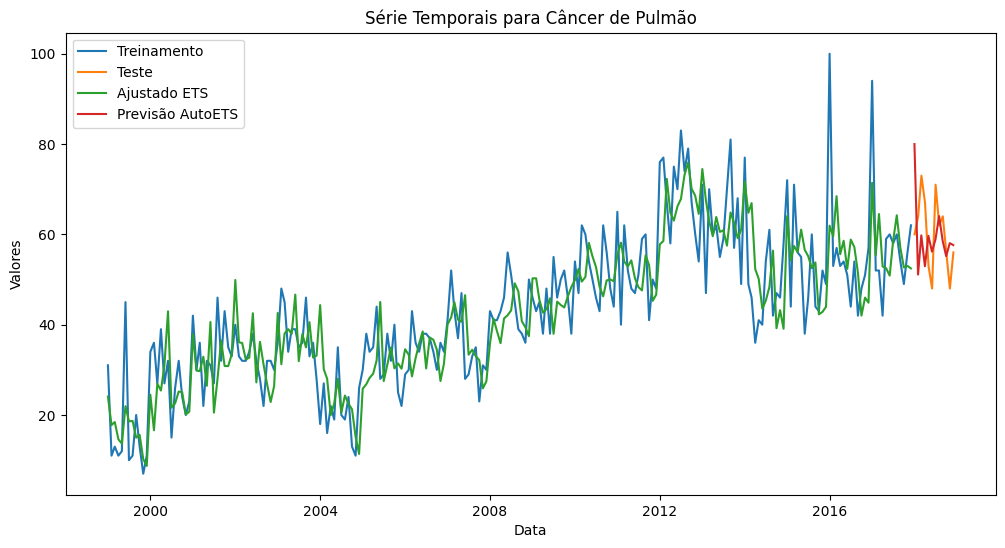

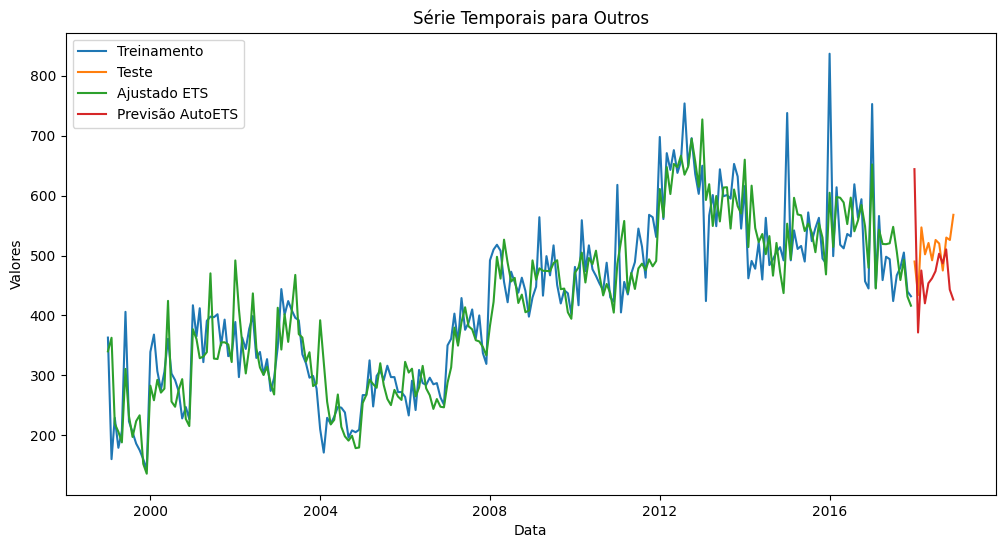

In [96]:
plot_forecasts_with_ETS(train_centro_oeste, teste_centro_oeste, df_forecast, values)

##### Sul

In [39]:
df_sul_mama = df_sul[df_sul['categoria_doenca'] == 'Câncer de Mama']
df_sul_prostata = df_sul[df_sul['categoria_doenca'] == 'Câncer de Próstata']
df_sul_utero = df_sul[df_sul['categoria_doenca'] == 'Câncer de Colo do Útero']
df_sul_pele = df_sul[df_sul['categoria_doenca'] == 'Câncer de Pele']
df_sul_pulmao = df_sul[df_sul['categoria_doenca'] == 'Câncer de Pulmão']
df_sul_outros = df_sul[df_sul['categoria_doenca'] == 'Outros']

In [40]:
df_sul_mama.head()

year_month Regiao categoria_doenca   y
372    1993-01    SUL   Câncer de Mama  27
390    1993-02    SUL   Câncer de Mama  28
408    1993-03    SUL   Câncer de Mama  45
426    1993-04    SUL   Câncer de Mama  41
444    1993-05    SUL   Câncer de Mama  39

In [41]:
dfs_sul = [df_sul_mama, df_sul_prostata, df_sul_utero, df_sul_pele, df_sul_pulmao, df_sul_outros]

for df in dfs_sul:
    data_mais_antiga, data_mais_recente, todas_datas_presentes = verificar_periodo_completo(df, 'year_month')
    print(f"Data mais antiga: {data_mais_antiga}, Data mais recente: {data_mais_recente}, Todas as datas presentes: {todas_datas_presentes}")

Data mais antiga: 1993-01, Data mais recente: 2018-12, Todas as datas presentes: True
Data mais antiga: 1993-01, Data mais recente: 2018-12, Todas as datas presentes: True
Data mais antiga: 1993-01, Data mais recente: 2018-12, Todas as datas presentes: True
Data mais antiga: 1993-01, Data mais recente: 2018-12, Todas as datas presentes: True
Data mais antiga: 1993-01, Data mais recente: 2018-12, Todas as datas presentes: True
Data mais antiga: 1993-01, Data mais recente: 2018-12, Todas as datas presentes: True


In [42]:
df_sul_mama = df_sul_mama.drop('Regiao', axis=1)
df_sul_prostata = df_sul_prostata.drop('Regiao', axis=1)
df_sul_utero = df_sul_utero.drop('Regiao', axis=1)
df_sul_pele = df_sul_pele.drop('Regiao', axis=1)
df_sul_pulmao = df_sul_pulmao.drop('Regiao', axis=1)
df_sul_outros = df_sul_outros.drop('Regiao', axis=1)

In [43]:
df_sul_outros.head()

year_month categoria_doenca    y
376    1993-01           Outros  194
394    1993-02           Outros  105
412    1993-03           Outros  152
430    1993-04           Outros  138
448    1993-05           Outros  152

In [44]:
serie_sul = concatenar_datasets(df_sul_mama, df_sul_prostata, df_sul_utero, df_sul_pele, df_sul_pulmao, df_sul_outros)

In [45]:
serie_sul.head()

year_month categoria_doenca   y
0    1993-01   Câncer de Mama  27
1    1993-02   Câncer de Mama  28
2    1993-03   Câncer de Mama  45
3    1993-04   Câncer de Mama  41
4    1993-05   Câncer de Mama  39

In [97]:
serie_sul.rename(columns={'year_month': 'ds', 'categoria_doenca': 'unique_id'}, inplace=True)

In [98]:
serie_sul['ds'] = serie_sul['ds'].apply(lambda x: x.to_timestamp())

In [99]:
teste_serie_sul = serie_sul.groupby('unique_id').tail(12)
train_serie_sul = serie_sul.drop(teste_serie_sul.index, axis = 0)

In [100]:
sf = StatsForecast(
    df=train_serie_sul,
    models=models,
    freq='M'
)

df_forecast = sf.forecast(12, fitted=True)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsforecast\core.py:467: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsforecast\core.py:467: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\utilsforecast\processing.py:362: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.

In [101]:
values = sf.forecast_fitted_values()
values.head(10)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsforecast\core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


ds     y  AutoARIMA    AutoETS
unique_id                                                     
Câncer de Colo do Útero 1993-01-01  14.0  13.986000  12.222785
Câncer de Colo do Útero 1993-02-01  13.0  13.789833   8.999746
Câncer de Colo do Útero 1993-03-01  12.0  13.332387  21.141230
Câncer de Colo do Útero 1993-04-01  15.0  13.040090  13.849148
Câncer de Colo do Útero 1993-05-01  18.0  13.736475  16.065958
Câncer de Colo do Útero 1993-06-01  15.0  14.842169  13.268376
Câncer de Colo do Útero 1993-07-01   8.0  14.745222  17.433983
Câncer de Colo do Útero 1993-08-01  16.0  13.135076  11.127076
Câncer de Colo do Útero 1993-09-01  15.0  13.850434  11.818373
Câncer de Colo do Útero 1993-10-01  13.0  14.113023  13.943730

In [102]:
df_forecast = df_forecast.reset_index()
values = values.reset_index()

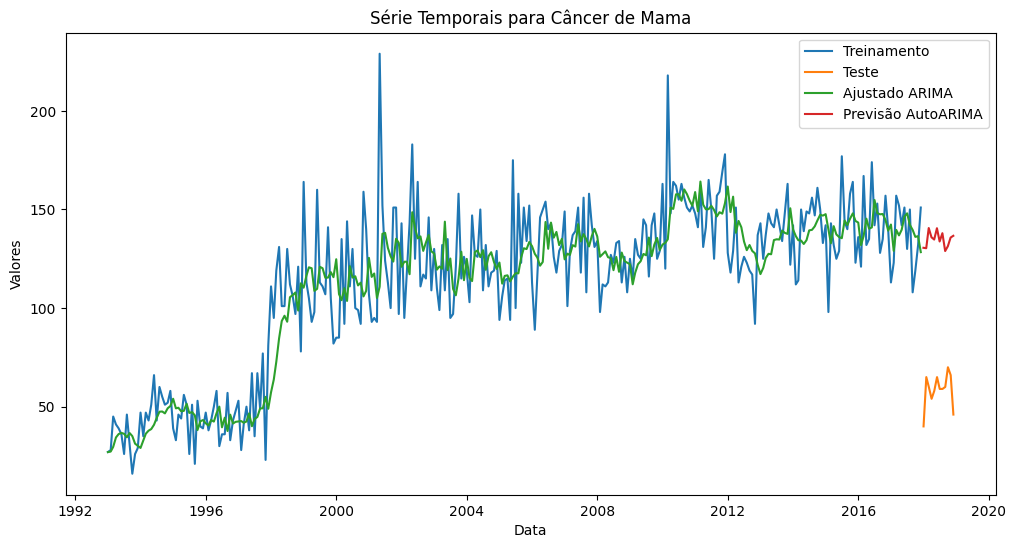

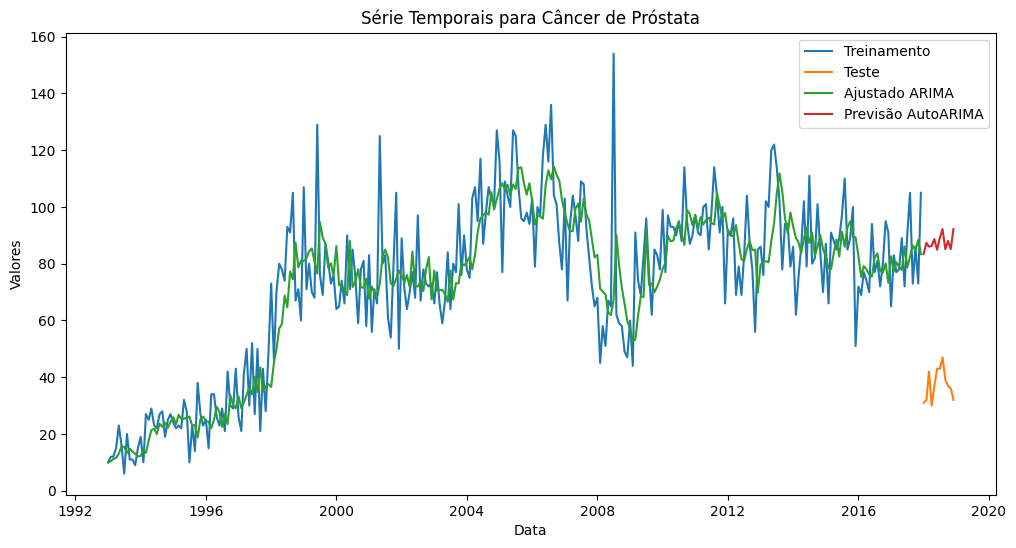

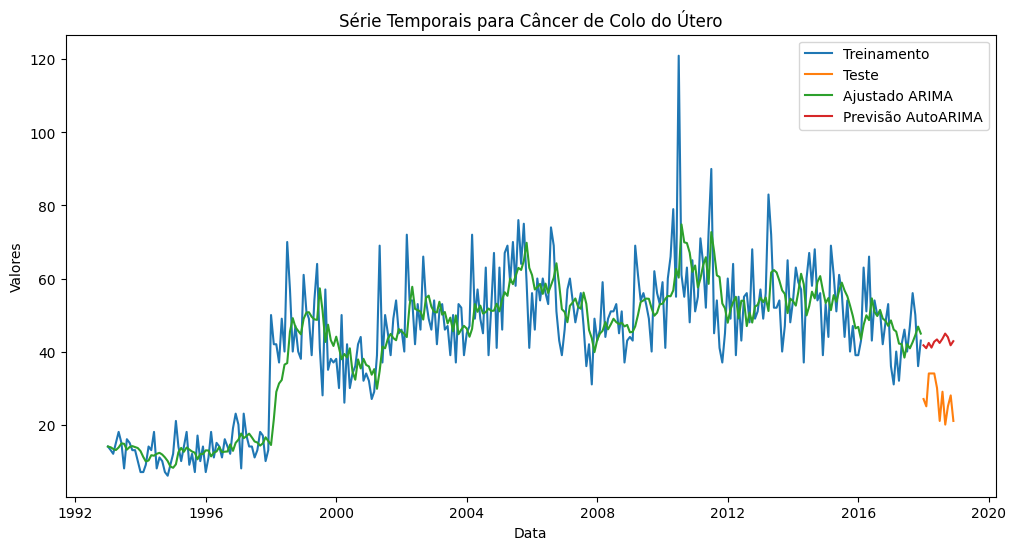

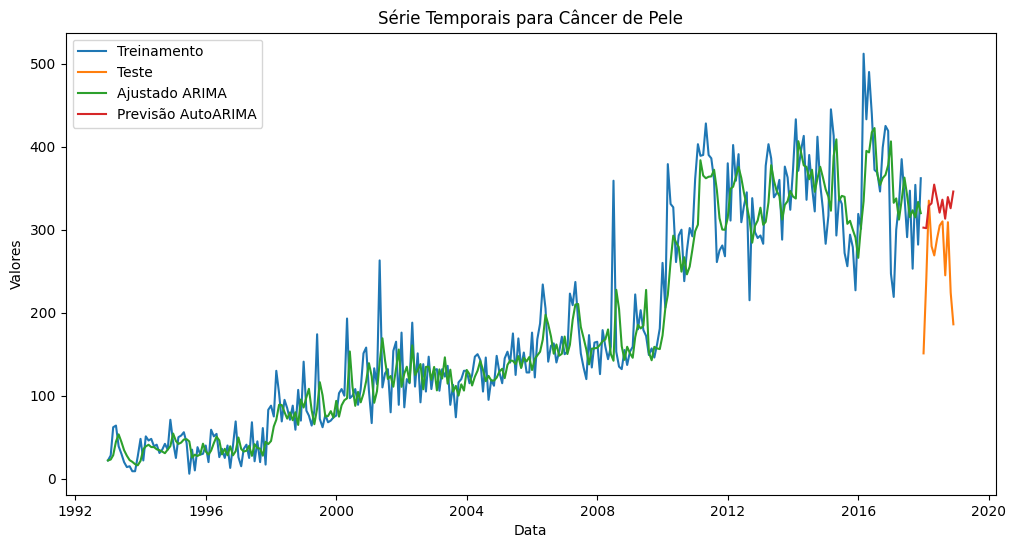

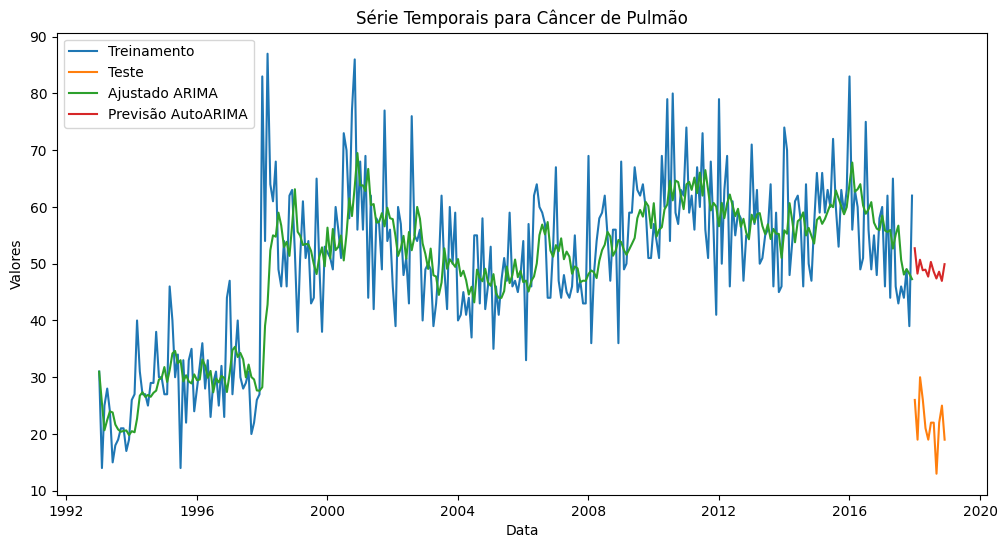

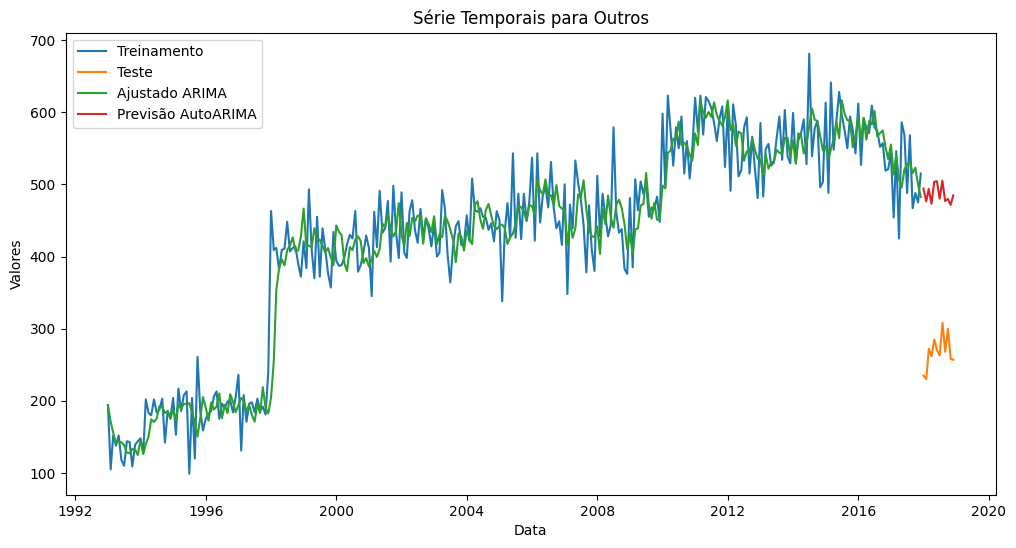

In [103]:
plot_forecasts_with_ARIMA(train_serie_sul, teste_serie_sul, df_forecast, values)

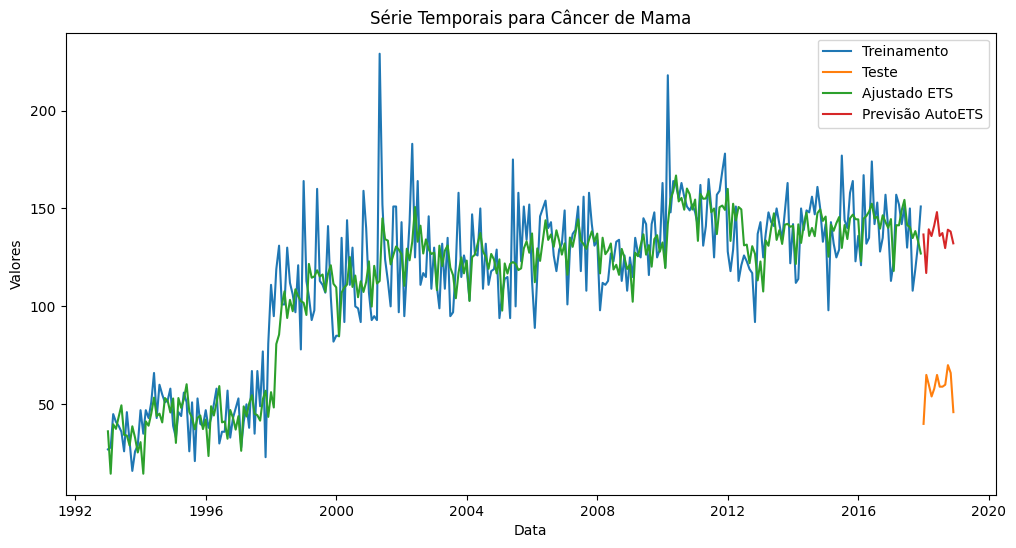

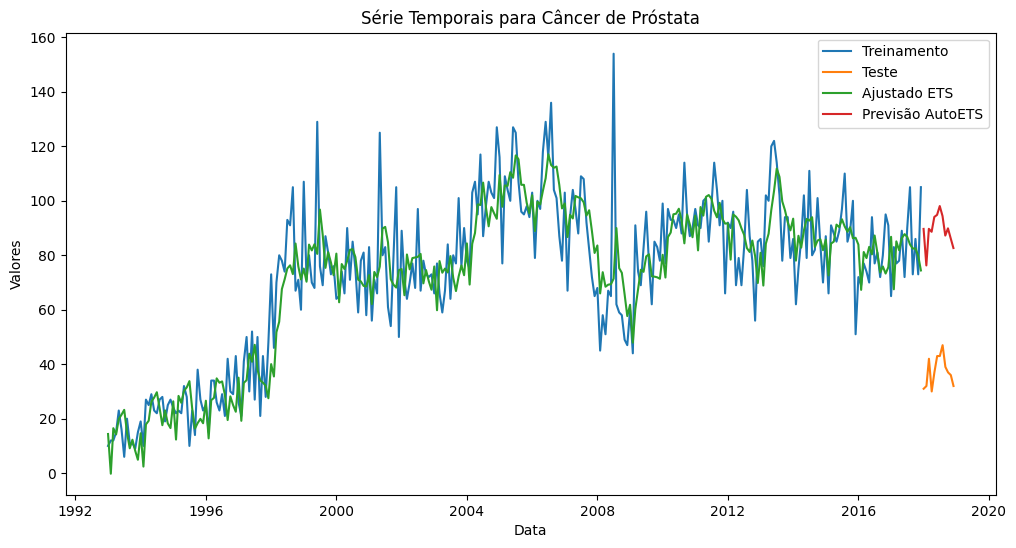

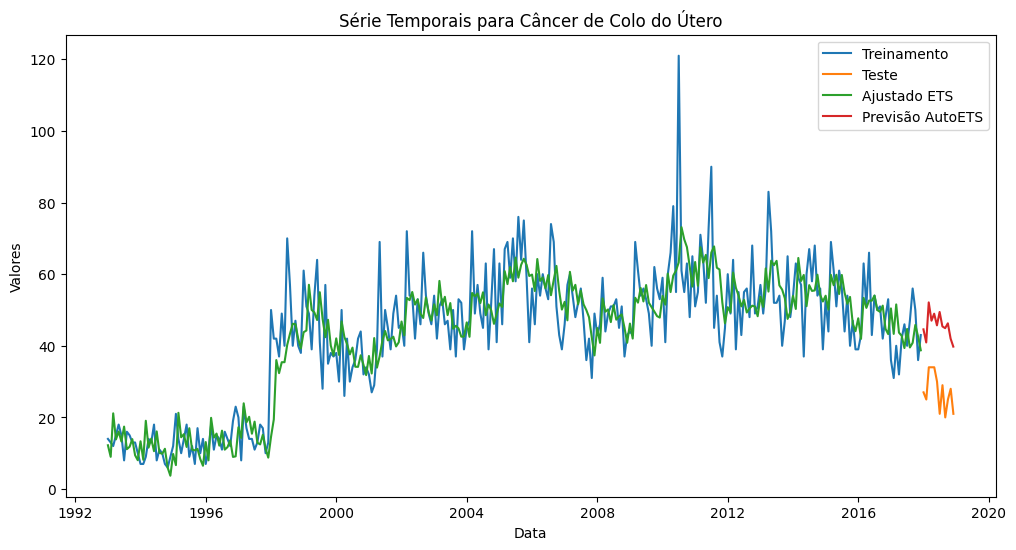

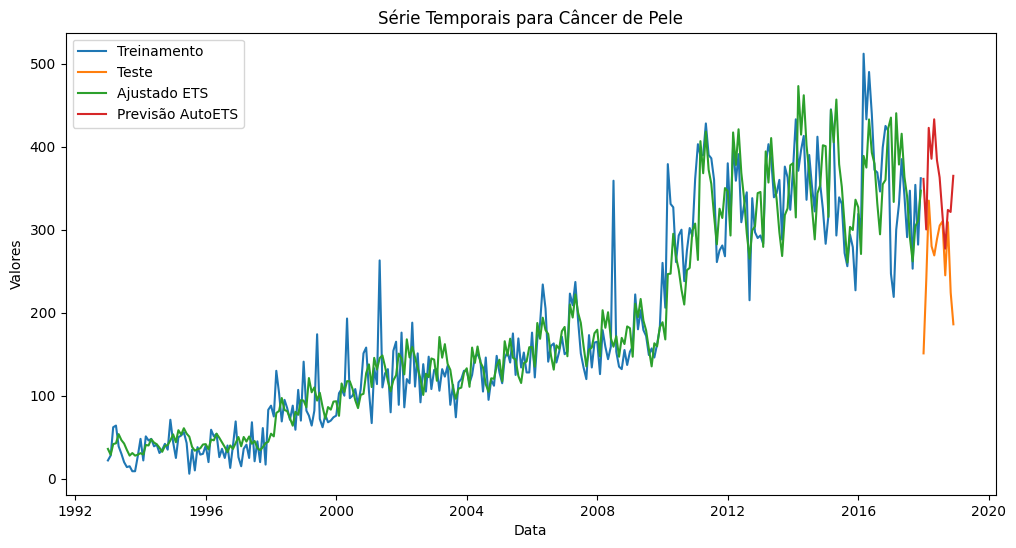

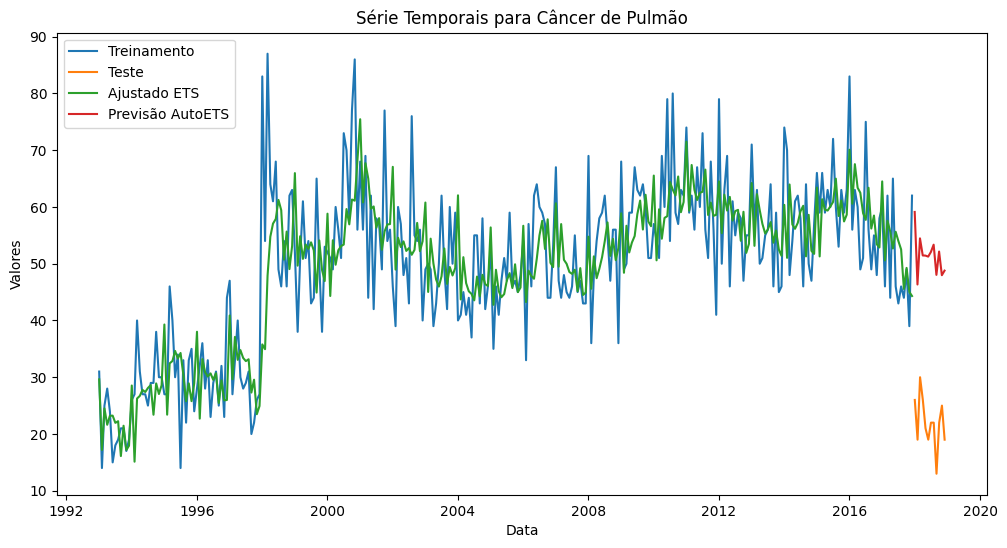

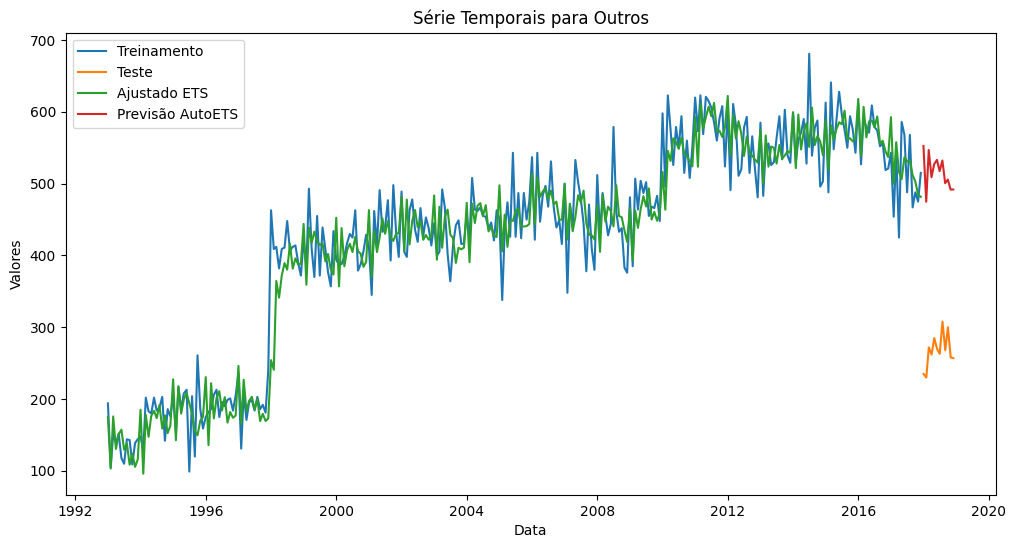

In [104]:
plot_forecasts_with_ETS(train_serie_sul, teste_serie_sul, df_forecast, values)

##### Norte

In [46]:
df_norte_mama = df_norte[df_norte['categoria_doenca'] == 'Câncer de Mama']
df_norte_prostata = df_norte[df_norte['categoria_doenca'] == 'Câncer de Próstata']
df_norte_utero = df_norte[df_norte['categoria_doenca'] == 'Câncer de Colo do Útero']
df_norte_pele = df_norte[df_norte['categoria_doenca'] == 'Câncer de Pele']
df_norte_pulmao = df_norte[df_norte['categoria_doenca'] == 'Câncer de Pulmão']
df_norte_outros = df_norte[df_norte['categoria_doenca'] == 'Outros']

In [47]:
df_norte_mama.head()

year_month Regiao categoria_doenca   y
1006    1996-01  NORTE   Câncer de Mama   9
1030    1996-02  NORTE   Câncer de Mama  11
1054    1996-03  NORTE   Câncer de Mama  17
1078    1996-04  NORTE   Câncer de Mama  14
1102    1996-05  NORTE   Câncer de Mama   6

In [48]:
dfs_norte = [df_norte_mama, df_norte_prostata, df_norte_utero, df_norte_pele, df_norte_pulmao, df_norte_outros]

for df in dfs_norte:
    data_mais_antiga, data_mais_recente, todas_datas_presentes = verificar_periodo_completo(df, 'year_month')
    print(f"Data mais antiga: {data_mais_antiga}, Data mais recente: {data_mais_recente}, Todas as datas presentes: {todas_datas_presentes}")

Data mais antiga: 1996-01, Data mais recente: 2019-12, Todas as datas presentes: True
Data mais antiga: 1996-01, Data mais recente: 2019-12, Todas as datas presentes: True
Data mais antiga: 1996-01, Data mais recente: 2019-12, Todas as datas presentes: True
Data mais antiga: 1996-01, Data mais recente: 2019-12, Todas as datas presentes: True
Data mais antiga: 1996-01, Data mais recente: 2019-12, Todas as datas presentes: True
Data mais antiga: 1996-01, Data mais recente: 2019-12, Todas as datas presentes: True


In [49]:
df_norte_mama = df_norte_mama.drop('Regiao', axis=1)
df_norte_prostata = df_norte_prostata.drop('Regiao', axis=1)
df_norte_utero = df_norte_utero.drop('Regiao', axis=1)
df_norte_pele = df_norte_pele.drop('Regiao', axis=1)
df_norte_pulmao = df_norte_pulmao.drop('Regiao', axis=1)
df_norte_outros = df_norte_outros.drop('Regiao', axis=1)

In [50]:
df_norte_outros.head()

year_month categoria_doenca   y
1010    1996-01           Outros  87
1034    1996-02           Outros  70
1058    1996-03           Outros  83
1082    1996-04           Outros  79
1106    1996-05           Outros  65

In [51]:
serie_norte = concatenar_datasets(df_norte_mama, df_norte_prostata, df_norte_utero, df_norte_pele, df_norte_pulmao, df_norte_outros)

In [52]:
serie_norte.head()

year_month categoria_doenca   y
0    1996-01   Câncer de Mama   9
1    1996-02   Câncer de Mama  11
2    1996-03   Câncer de Mama  17
3    1996-04   Câncer de Mama  14
4    1996-05   Câncer de Mama   6

In [105]:
serie_norte.rename(columns={'year_month': 'ds', 'categoria_doenca': 'unique_id'}, inplace=True)

In [106]:
serie_norte['ds'] = serie_norte['ds'].apply(lambda x: x.to_timestamp())

In [107]:
teste_serie_norte = serie_norte.groupby('unique_id').tail(12)
train_serie_norte = serie_norte.drop(teste_serie_norte.index, axis = 0)

In [108]:
sf = StatsForecast(
    df=train_serie_norte,
    models=models,
    freq='M'
)

df_forecast = sf.forecast(12, fitted=True)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsforecast\core.py:467: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsforecast\core.py:467: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\utilsforecast\processing.py:362: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.

In [109]:
values = sf.forecast_fitted_values()
values.head(10)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsforecast\core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


ds     y  AutoARIMA    AutoETS
unique_id                                                     
Câncer de Colo do Útero 1996-01-01  33.0  32.980946  28.362371
Câncer de Colo do Útero 1996-02-01  27.0  26.996126  23.766951
Câncer de Colo do Útero 1996-03-01  35.0  34.990704  30.243835
Câncer de Colo do Útero 1996-04-01  20.0  20.006300  26.807531
Câncer de Colo do Útero 1996-05-01  28.0  27.997789  26.984076
Câncer de Colo do Útero 1996-06-01  27.0  26.999081  29.425955
Câncer de Colo do Útero 1996-07-01  26.0  26.000143  77.874649
Câncer de Colo do Útero 1996-08-01  26.0  26.000126  25.451141
Câncer de Colo do Útero 1996-09-01  31.0  30.995382  22.667593
Câncer de Colo do Útero 1996-10-01  27.0  26.999649  25.479792

In [110]:
df_forecast = df_forecast.reset_index()
values = values.reset_index()

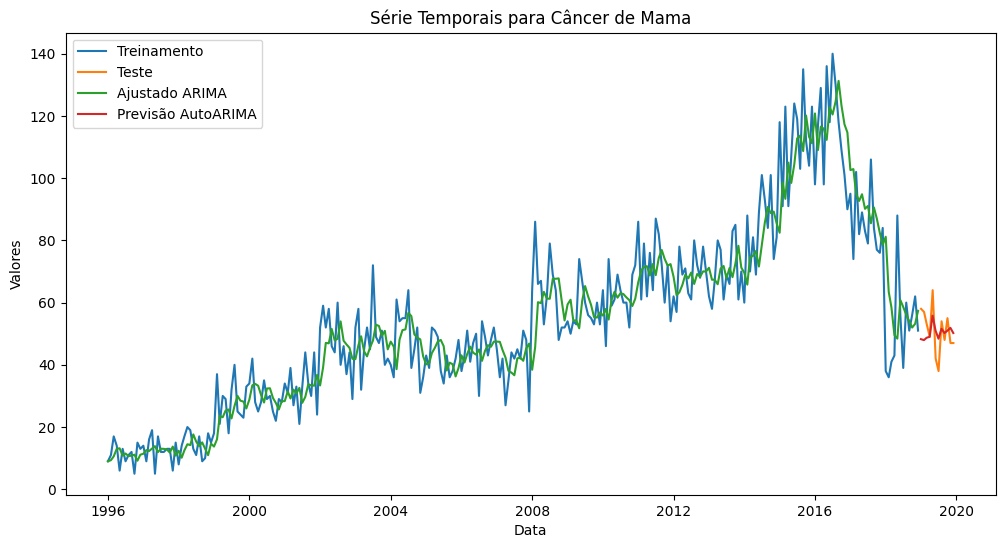

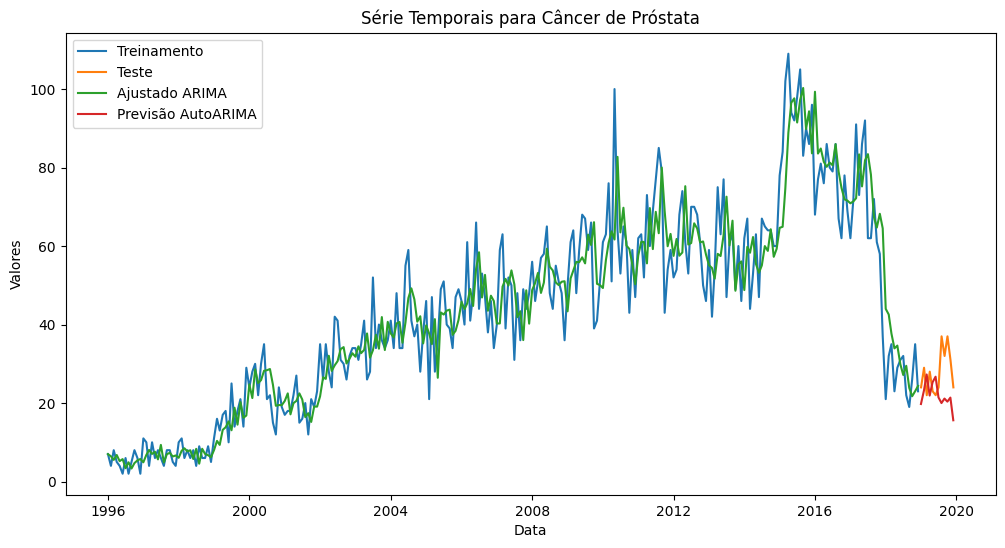

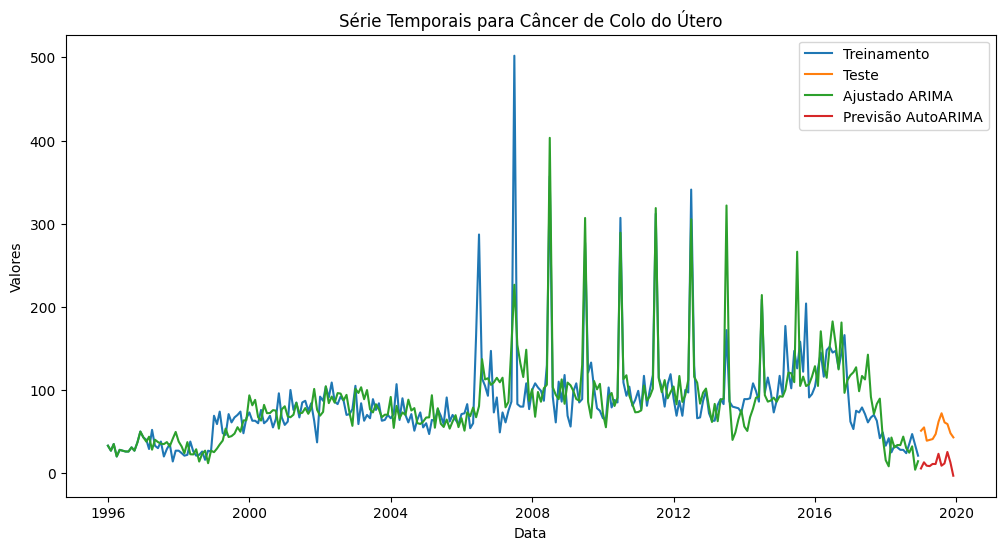

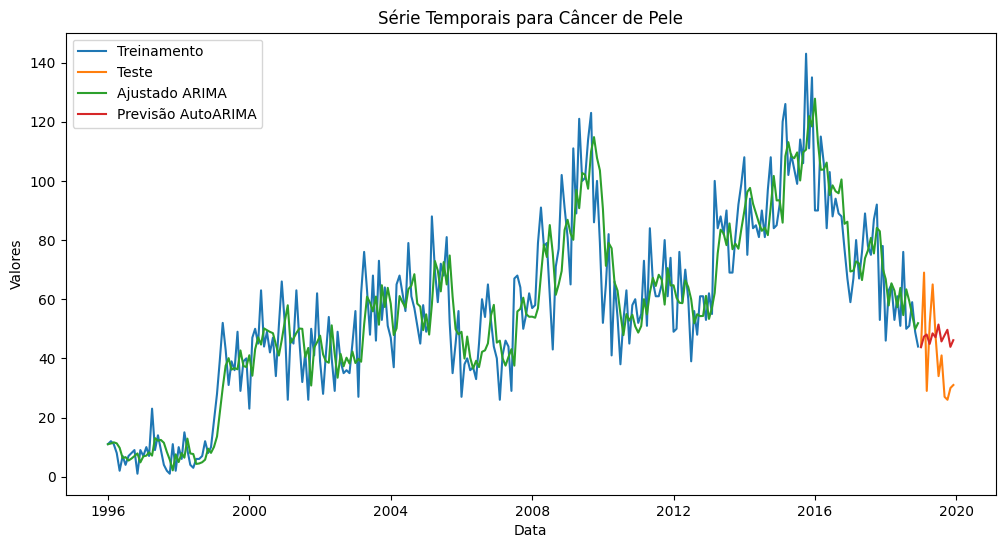

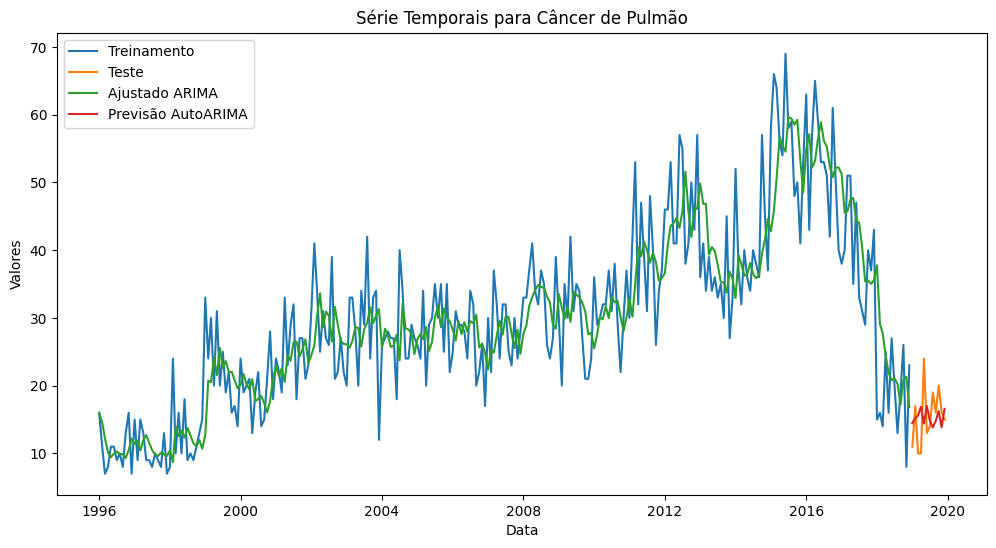

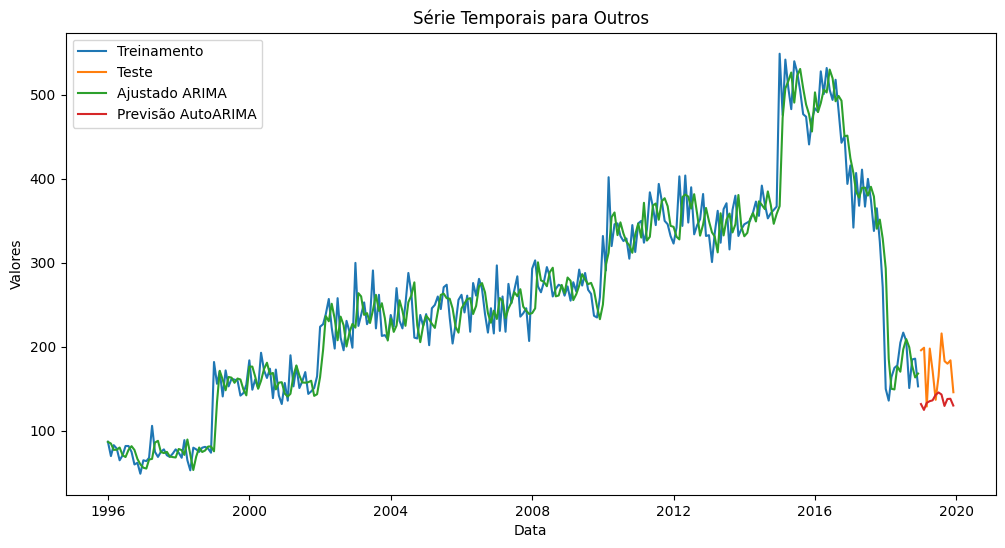

In [111]:
plot_forecasts_with_ARIMA(train_serie_norte, teste_serie_norte, df_forecast, values)

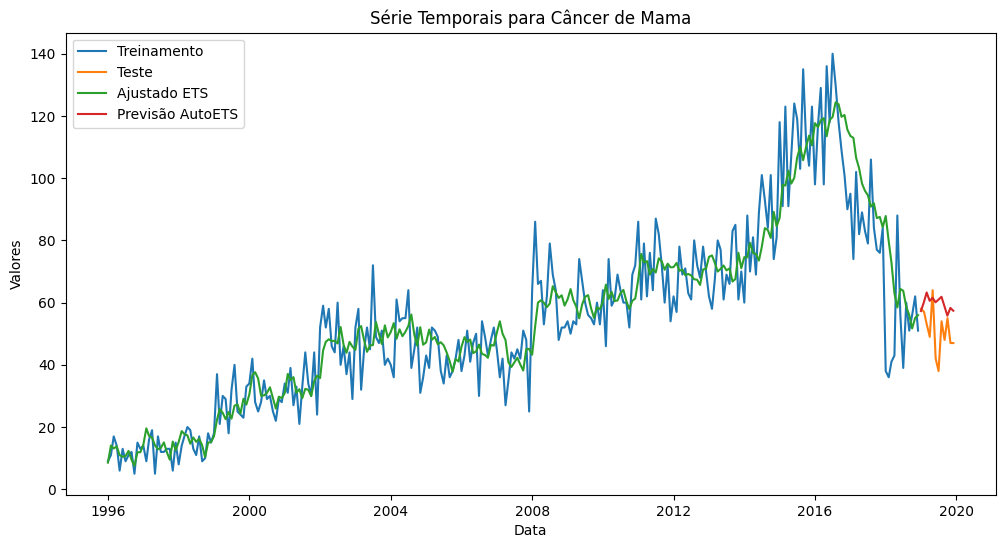

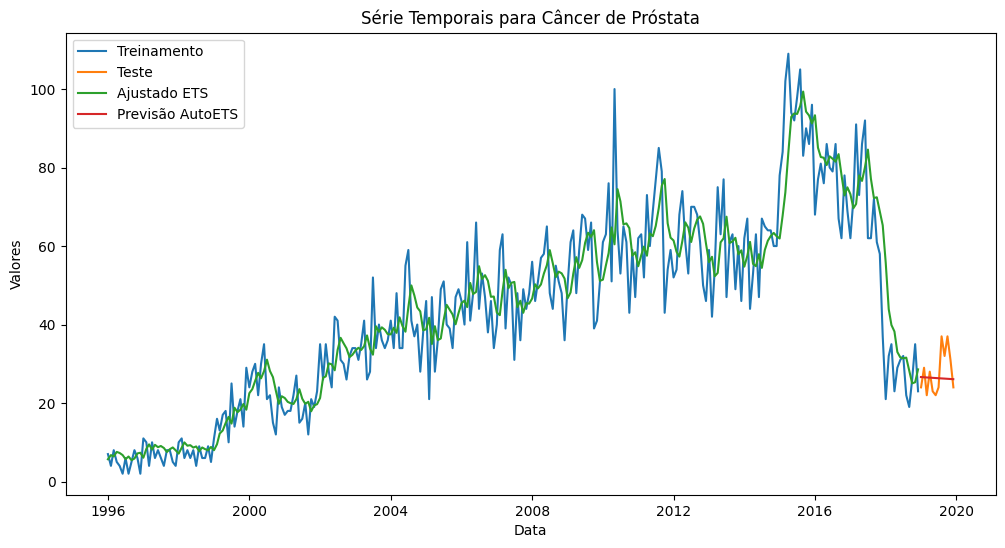

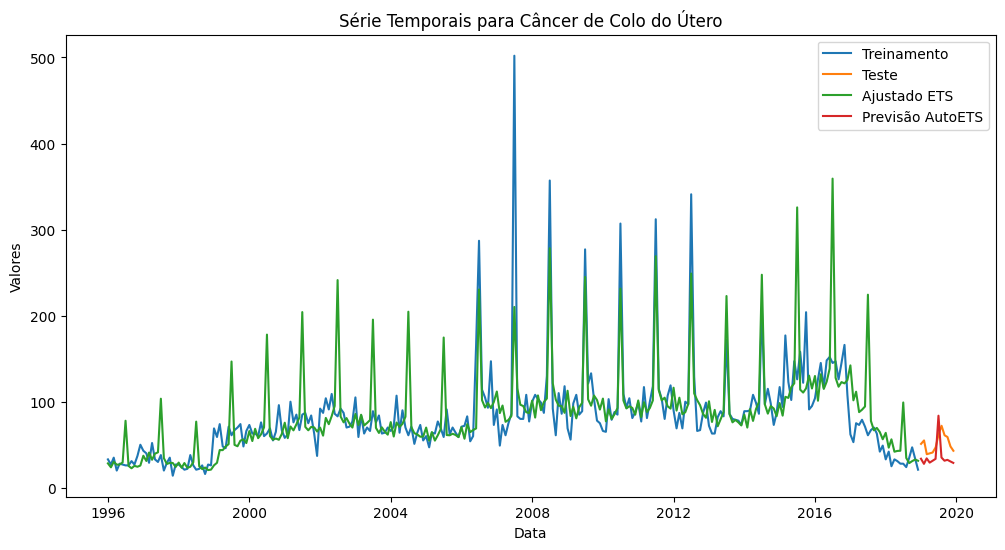

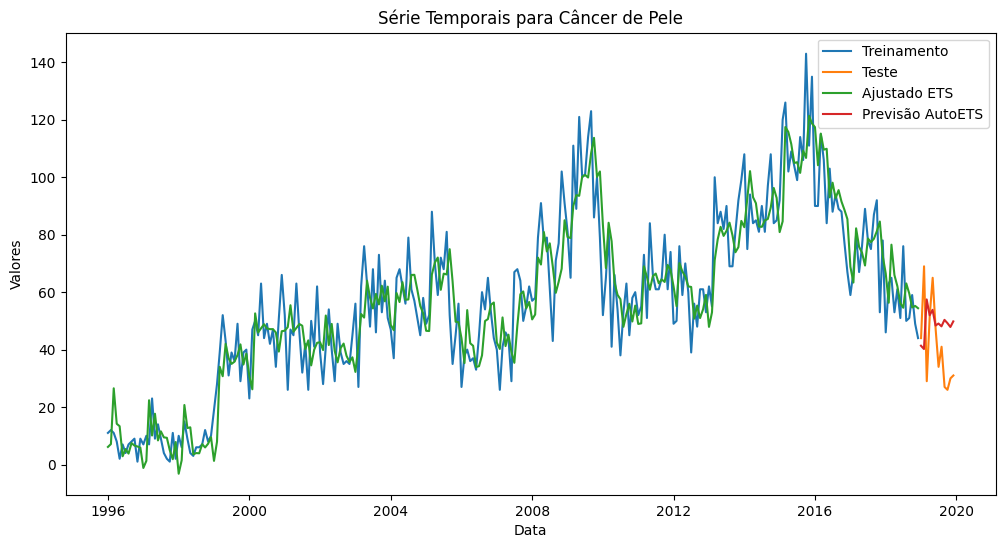

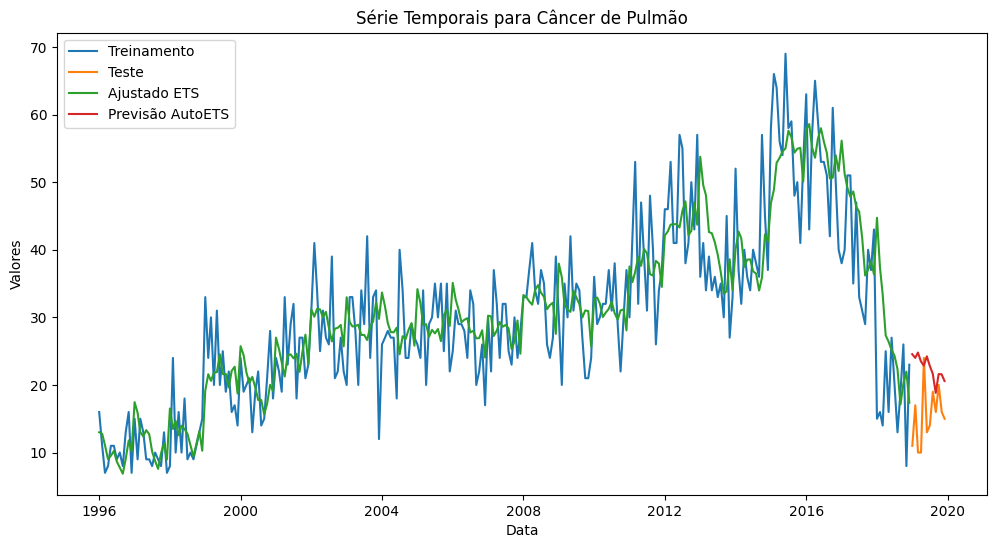

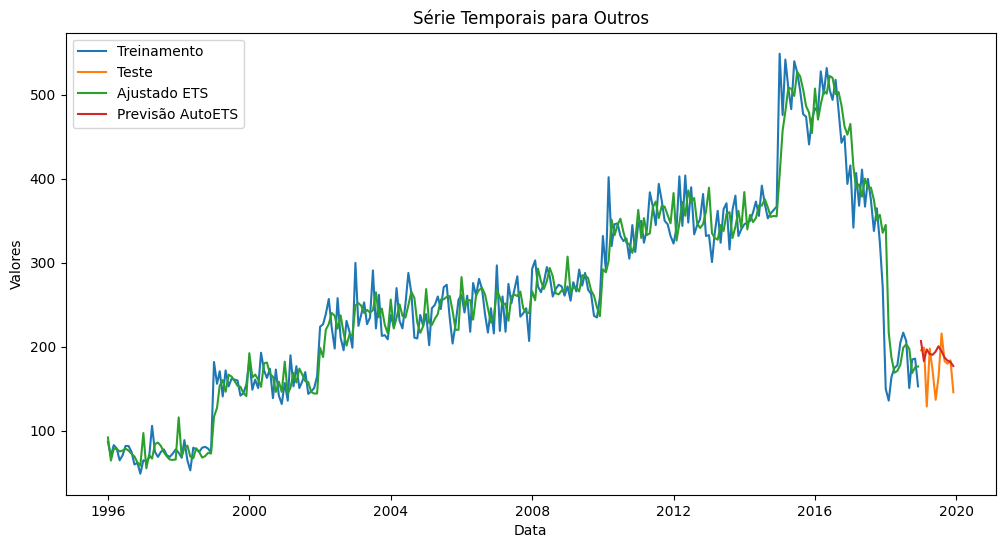

In [112]:
plot_forecasts_with_ETS(train_serie_norte, teste_serie_norte, df_forecast, values)